# Arithmetic/Logical Unit Exercises

Realize using DEEDS and VHDL a simple Arithmetic/Logical Unit (ALU) as described during the lectures. The ALU should be able to perform 8-bit addition, subtraction, bitwise AND, and bitwise OR operations:

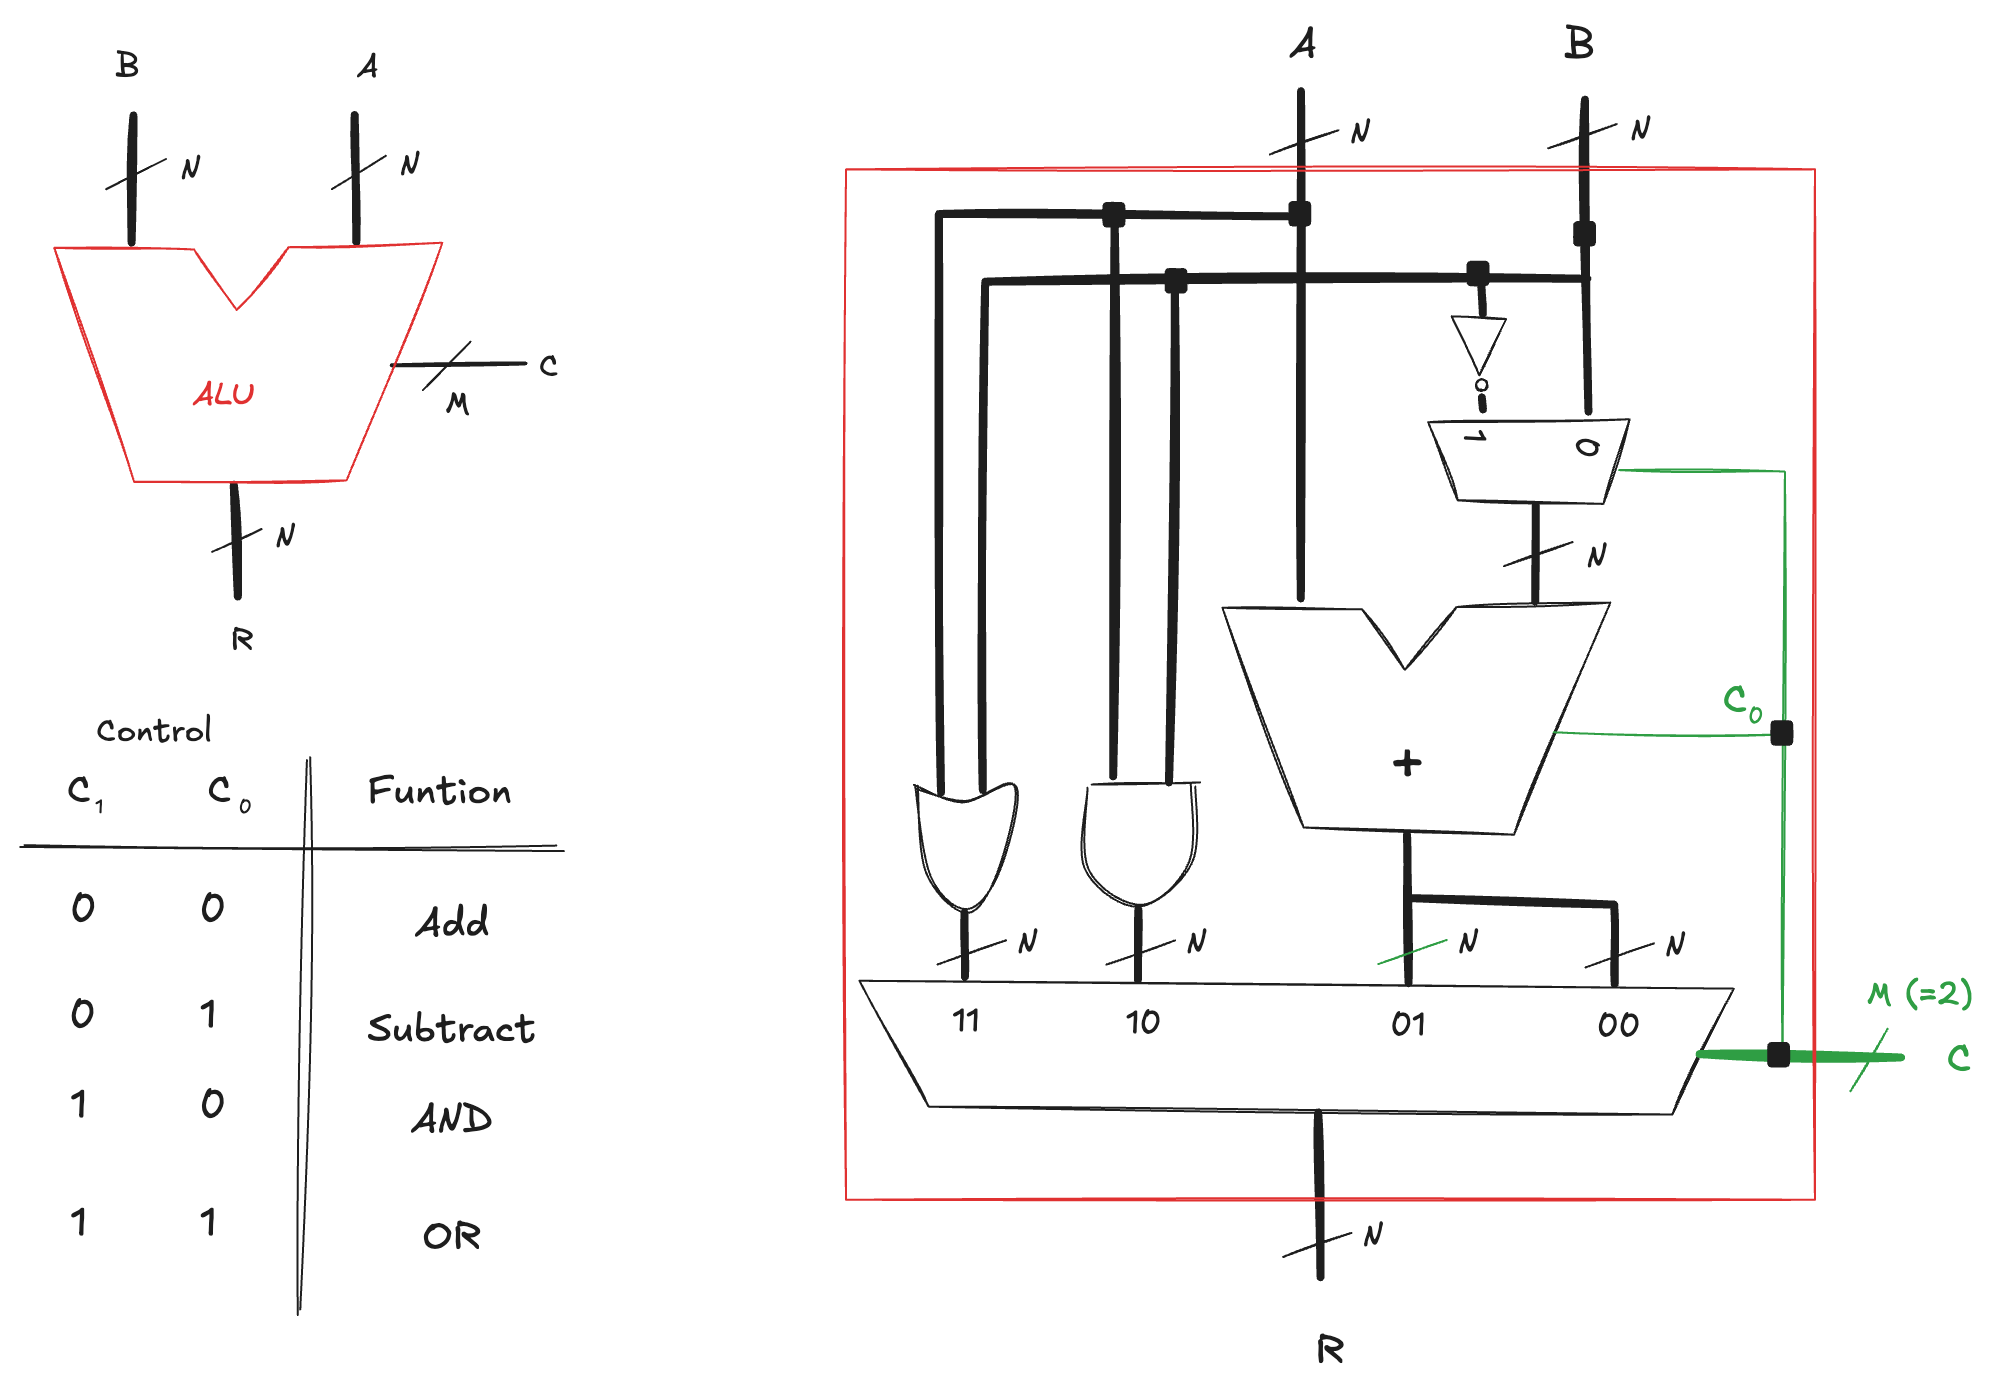

To build the ALU, we combine several key components: a 2-bit control decoder that selects the desired operation, a 4-to-1 multiplexer that chooses the final output, an 8-bit adder for arithmetic, and 8-bit AND and OR logic blocks for bitwise operations.

## 2-bit Multiplexer

Create a 2-to-1 multiplexer (mux), a circuit that selects one of two input signals and forwards it to the output depending on the value of a single select line.

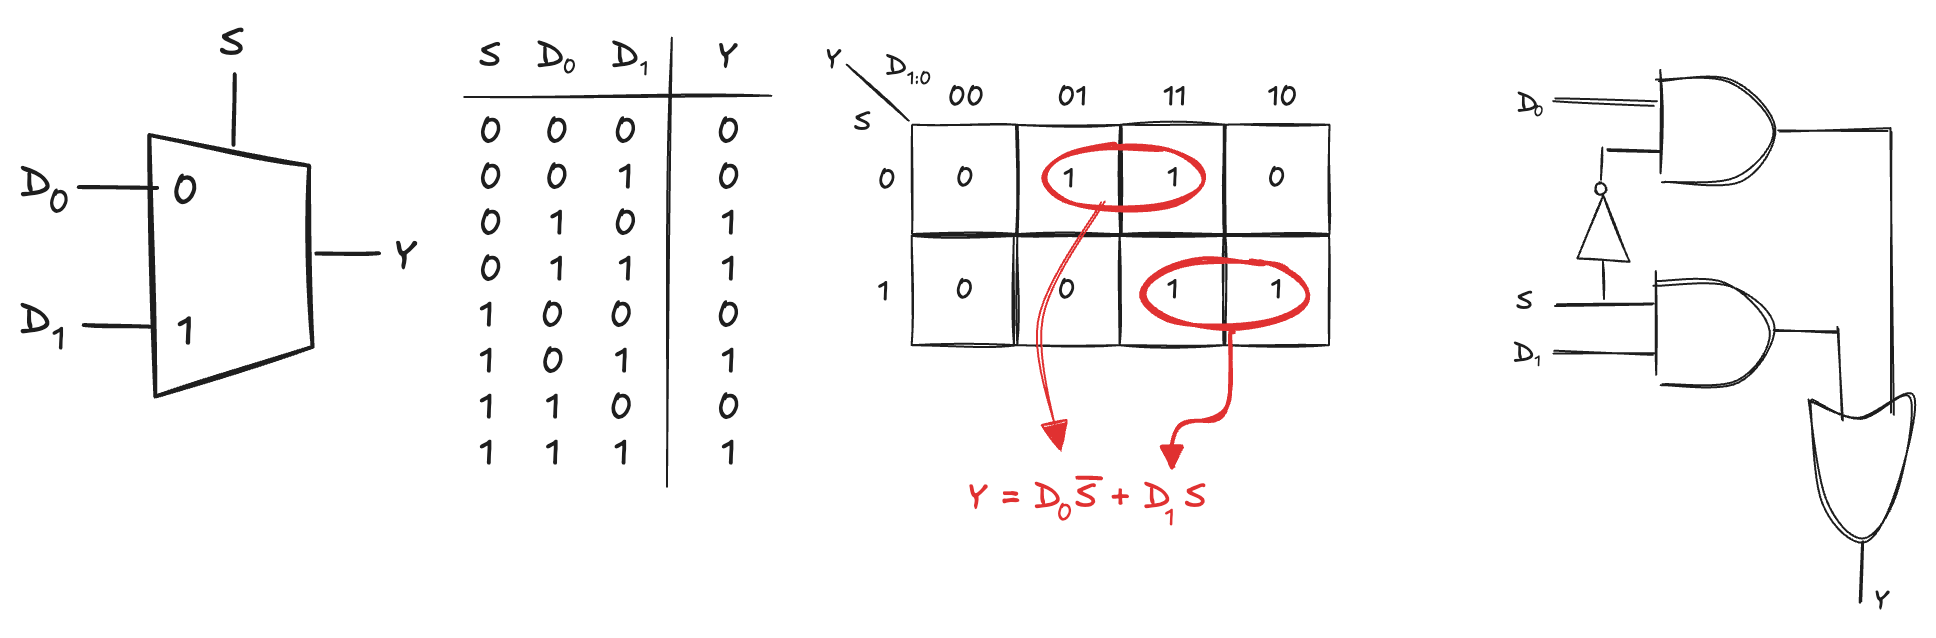

Design the circuit using DEEDS and simulate its truth table to verify its functionality.

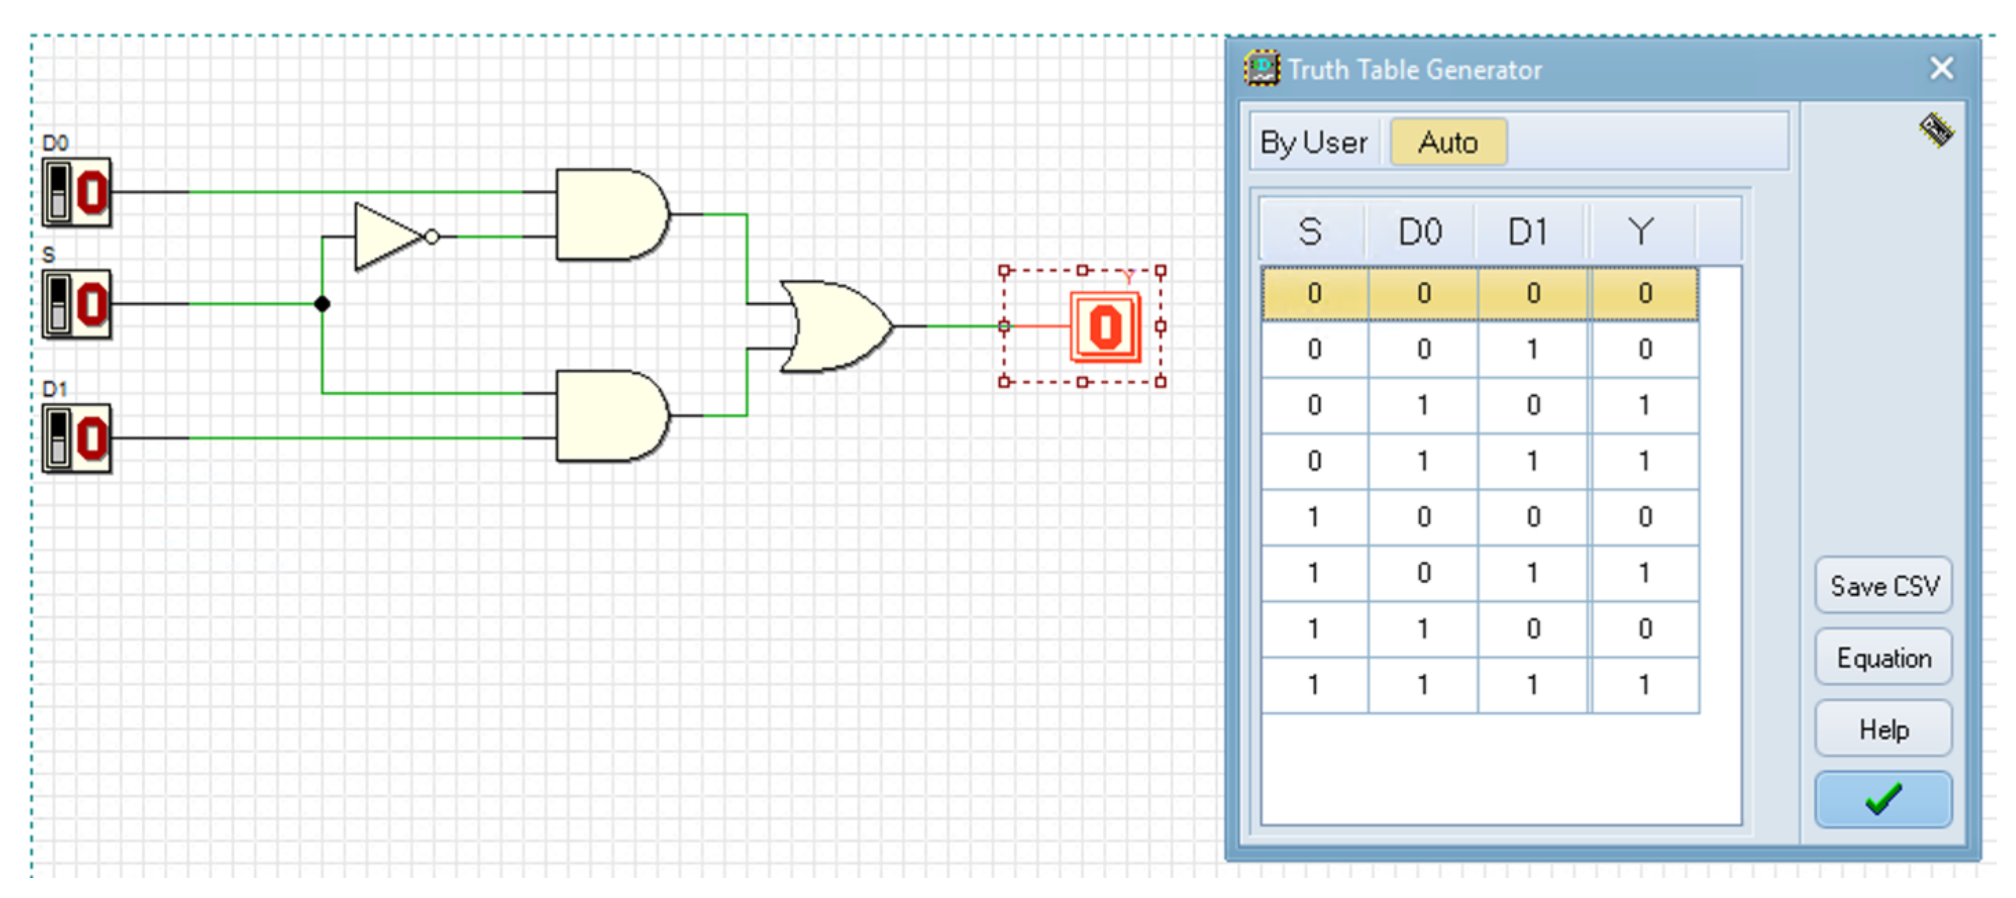

DEEDS allows us to create custom block components that can be reused in larger designs. Create a new block component for the multiplexer.

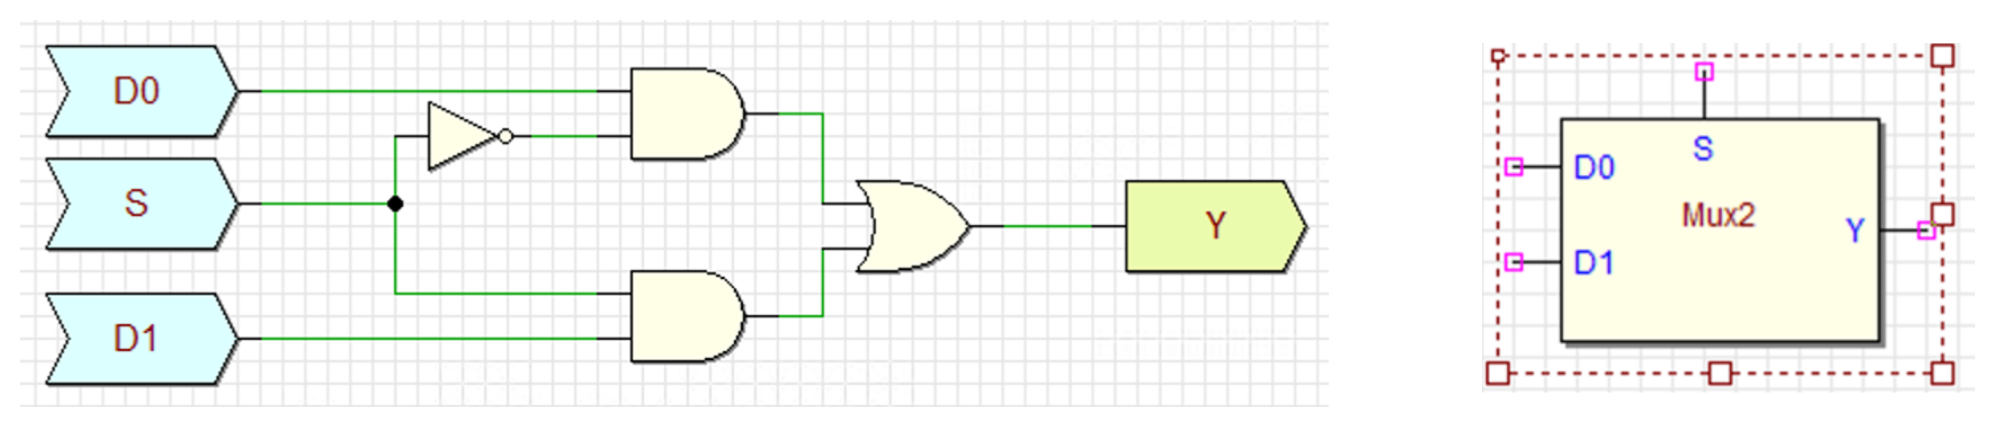

However, the multiplexer we need must handle two 8-bit inputs, so we must build an 8-bit version of the 2-to-1 mux. We can construct it by reusing the 1-bit mux as a building block and instantiating eight of them in parallel. DEEDS also provides bus-based components that simplify this task, allowing us to bundle the signals and connect the mux array more efficiently. Search the DEEDS component library and find a bus-based 2-to-1 multiplexer to use in our design.

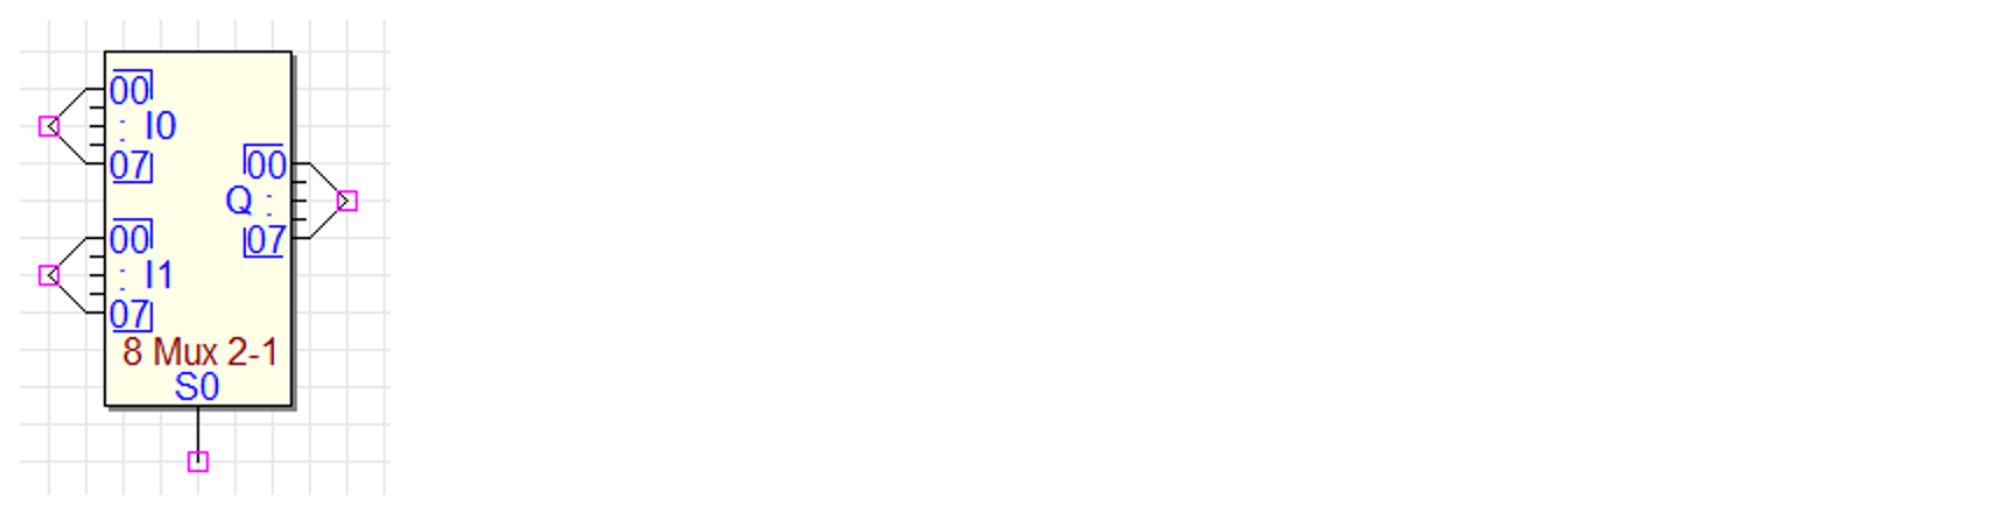

Develop the VHDL implementation of the 8-bit 2-to-1 multiplexer and add the source file to a Vivado project configured for the Artix-7 (xc7a200tfbg484-1) FPGA device.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity Mux2 is
    port(
        D0 : in  std_logic_vector(7 downto 0);
        D1 : in  std_logic_vector(7 downto 0);
        S  : in  std_logic;
        Y  : out std_logic_vector(7 downto 0)
    );
end entity Mux2;

architecture logic of Mux2 is
begin
    Y <= D0 when S = '0' else
         D1;
end architecture logic;


Create a testbench to validate the behavior of the 2-bit multiplexer. Simulate the design and verify that it produces the correct output for every possible input combination.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity tb_Mux2 is
end entity tb_Mux2;

architecture behavior of tb_Mux2 is

    component Mux2
        port(
            D0 : in  std_logic_vector(7 downto 0);
            D1 : in  std_logic_vector(7 downto 0);
            S  : in  std_logic;
            Y  : out std_logic_vector(7 downto 0)
        );
    end component;

    signal D0_tb : std_logic_vector(7 downto 0);
    signal D1_tb : std_logic_vector(7 downto 0);
    signal S_tb  : std_logic;
    signal Y_tb  : std_logic_vector(7 downto 0);

begin

    UUT: Mux2
        port map(
            D0 => D0_tb,
            D1 => D1_tb,
            S  => S_tb,
            Y  => Y_tb
        );

    stim_proc: process
    begin
        ----------------------------------------------------------------------
        -- Test 1
        ----------------------------------------------------------------------
        D0_tb <= "00001111";    -- 0x0F
        D1_tb <= "11110000";    -- 0xF0
        S_tb  <= '0';
        wait for 10 ns;

        assert (Y_tb = D0_tb)
            report "ERROR: Test 1 failed (S=0, expected Y=D0)"
            severity error;

        ----------------------------------------------------------------------
        -- Test 2
        ----------------------------------------------------------------------
        S_tb <= '1';
        wait for 10 ns;

        assert (Y_tb = D1_tb)
            report "ERROR: Test 2 failed (S=1, expected Y=D1)"
            severity error;

        ----------------------------------------------------------------------
        -- Test 3
        ----------------------------------------------------------------------
        D0_tb <= "10101010";    -- 0xAA
        D1_tb <= "01010101";    -- 0x55
        S_tb <= '0';
        wait for 10 ns;

        assert (Y_tb = D0_tb)
            report "ERROR: Test 3 failed (S=0, expected Y=D0)"
            severity error;

        ----------------------------------------------------------------------
        -- Test 4
        ----------------------------------------------------------------------
        S_tb <= '1';
        wait for 10 ns;

        assert (Y_tb = D1_tb)
            report "ERROR: Test 4 failed (S=1, expected Y=D1)"
            severity error;

        report "Mux2 tests passed successfully!" severity note;

        wait;
    end process;

end architecture behavior;


## 4-bit Multiplexer

We need a 4-to-1 multiplexer to select the correct value to drive to the output based on the input control signals: 

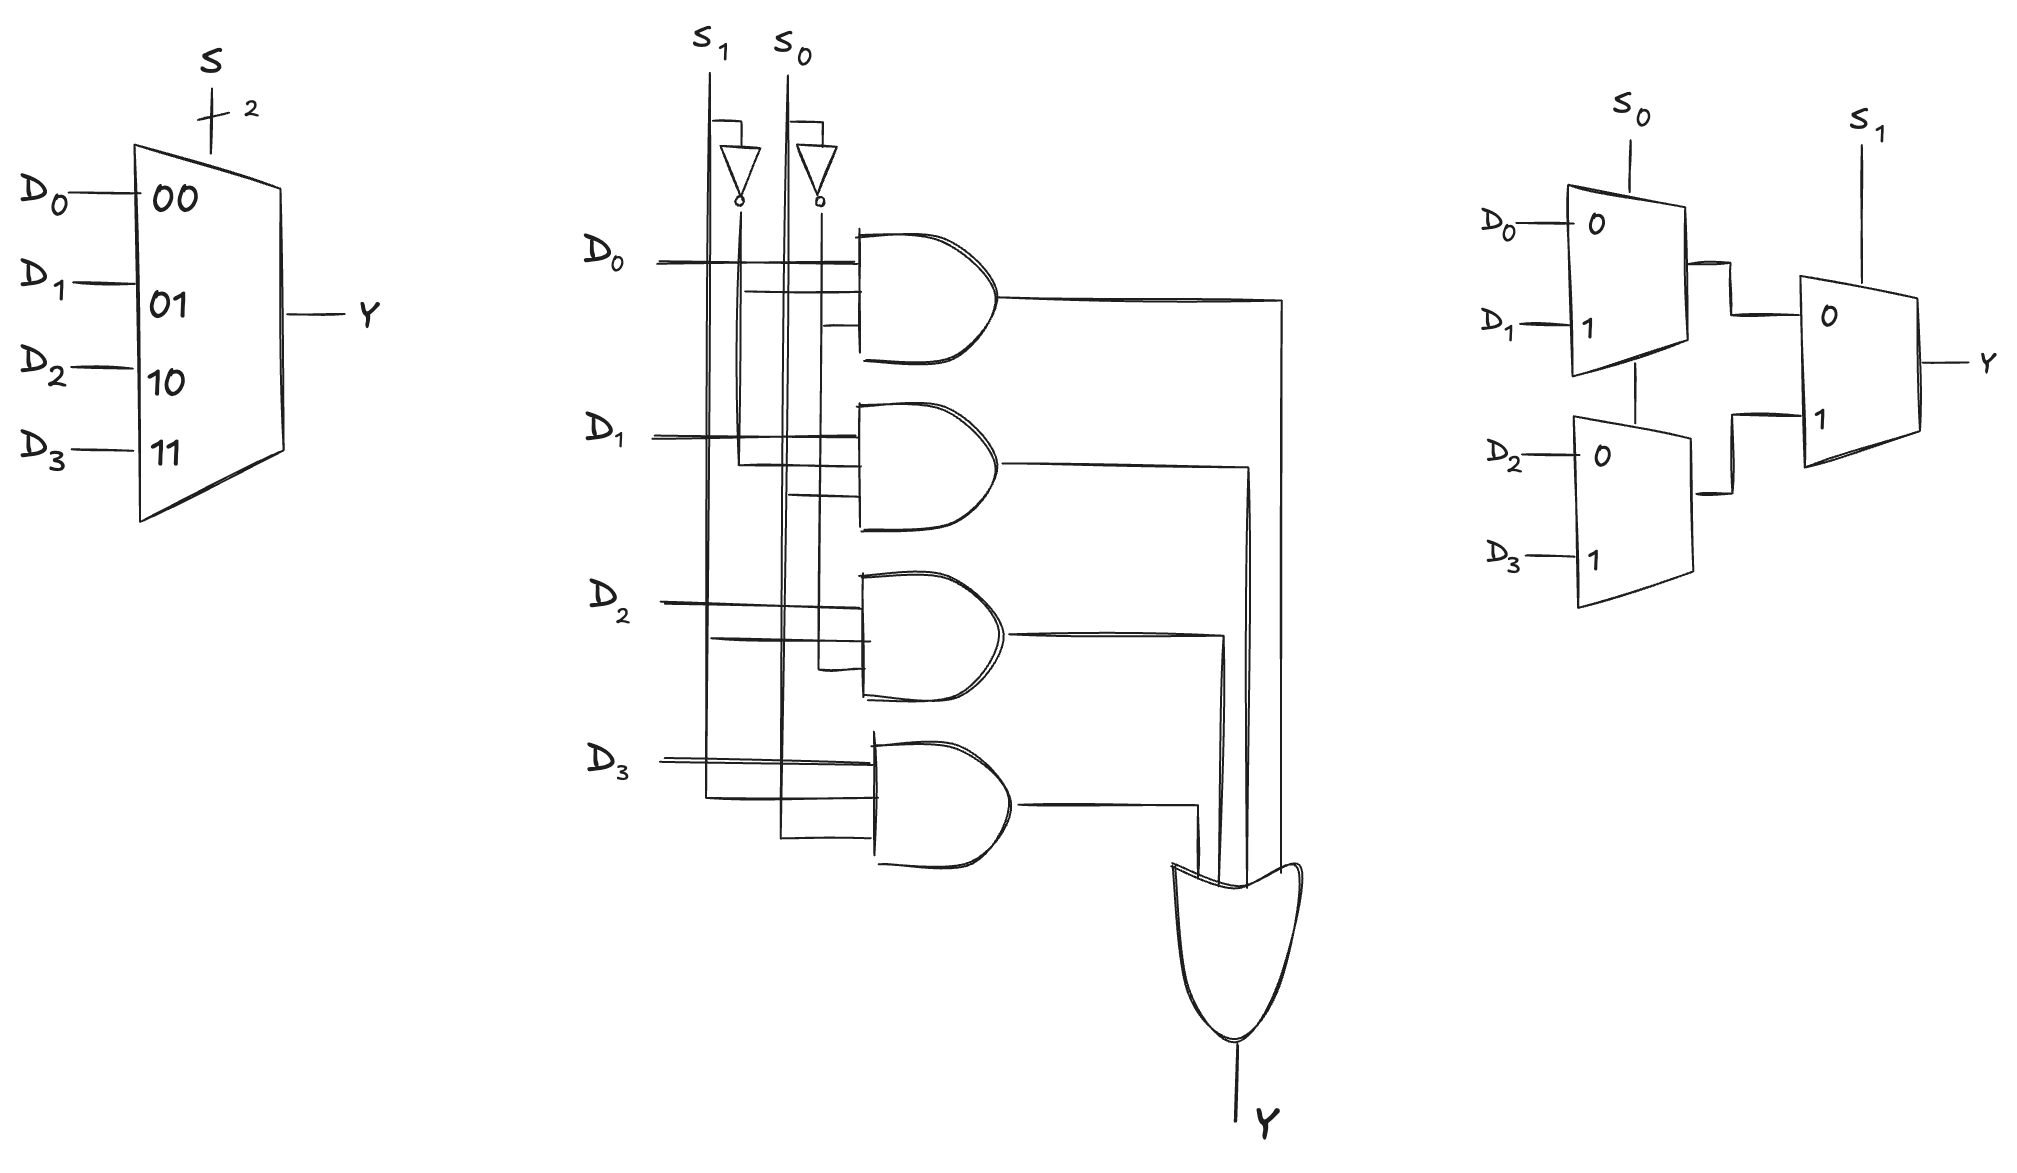

Design, using DEEDS, a 1-bit multiplexer that chooses one of four inputs, with the two select signals determining which input is routed to the output.

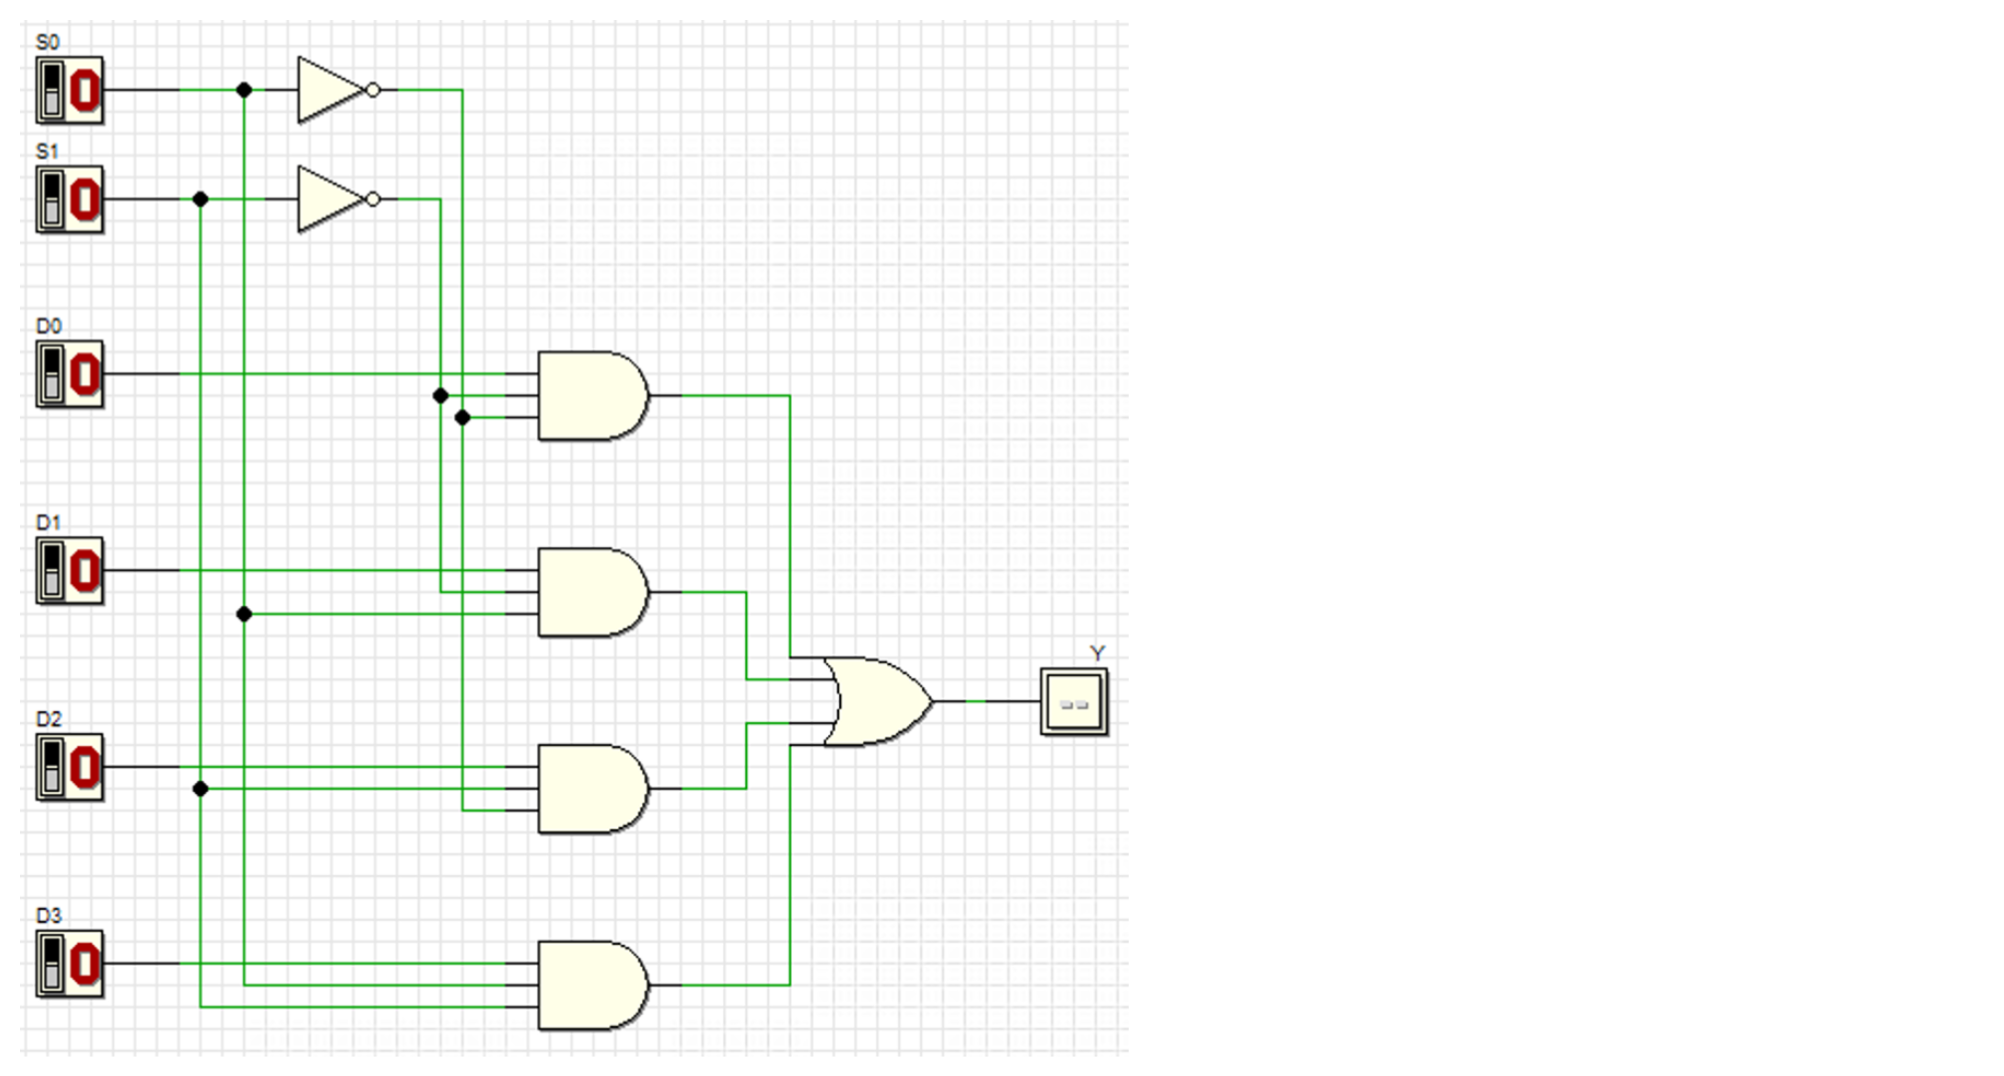

Build the DEEDS block component that implements the 4-to-1 multiplexer, so it can be reused as a module in more complex designs.

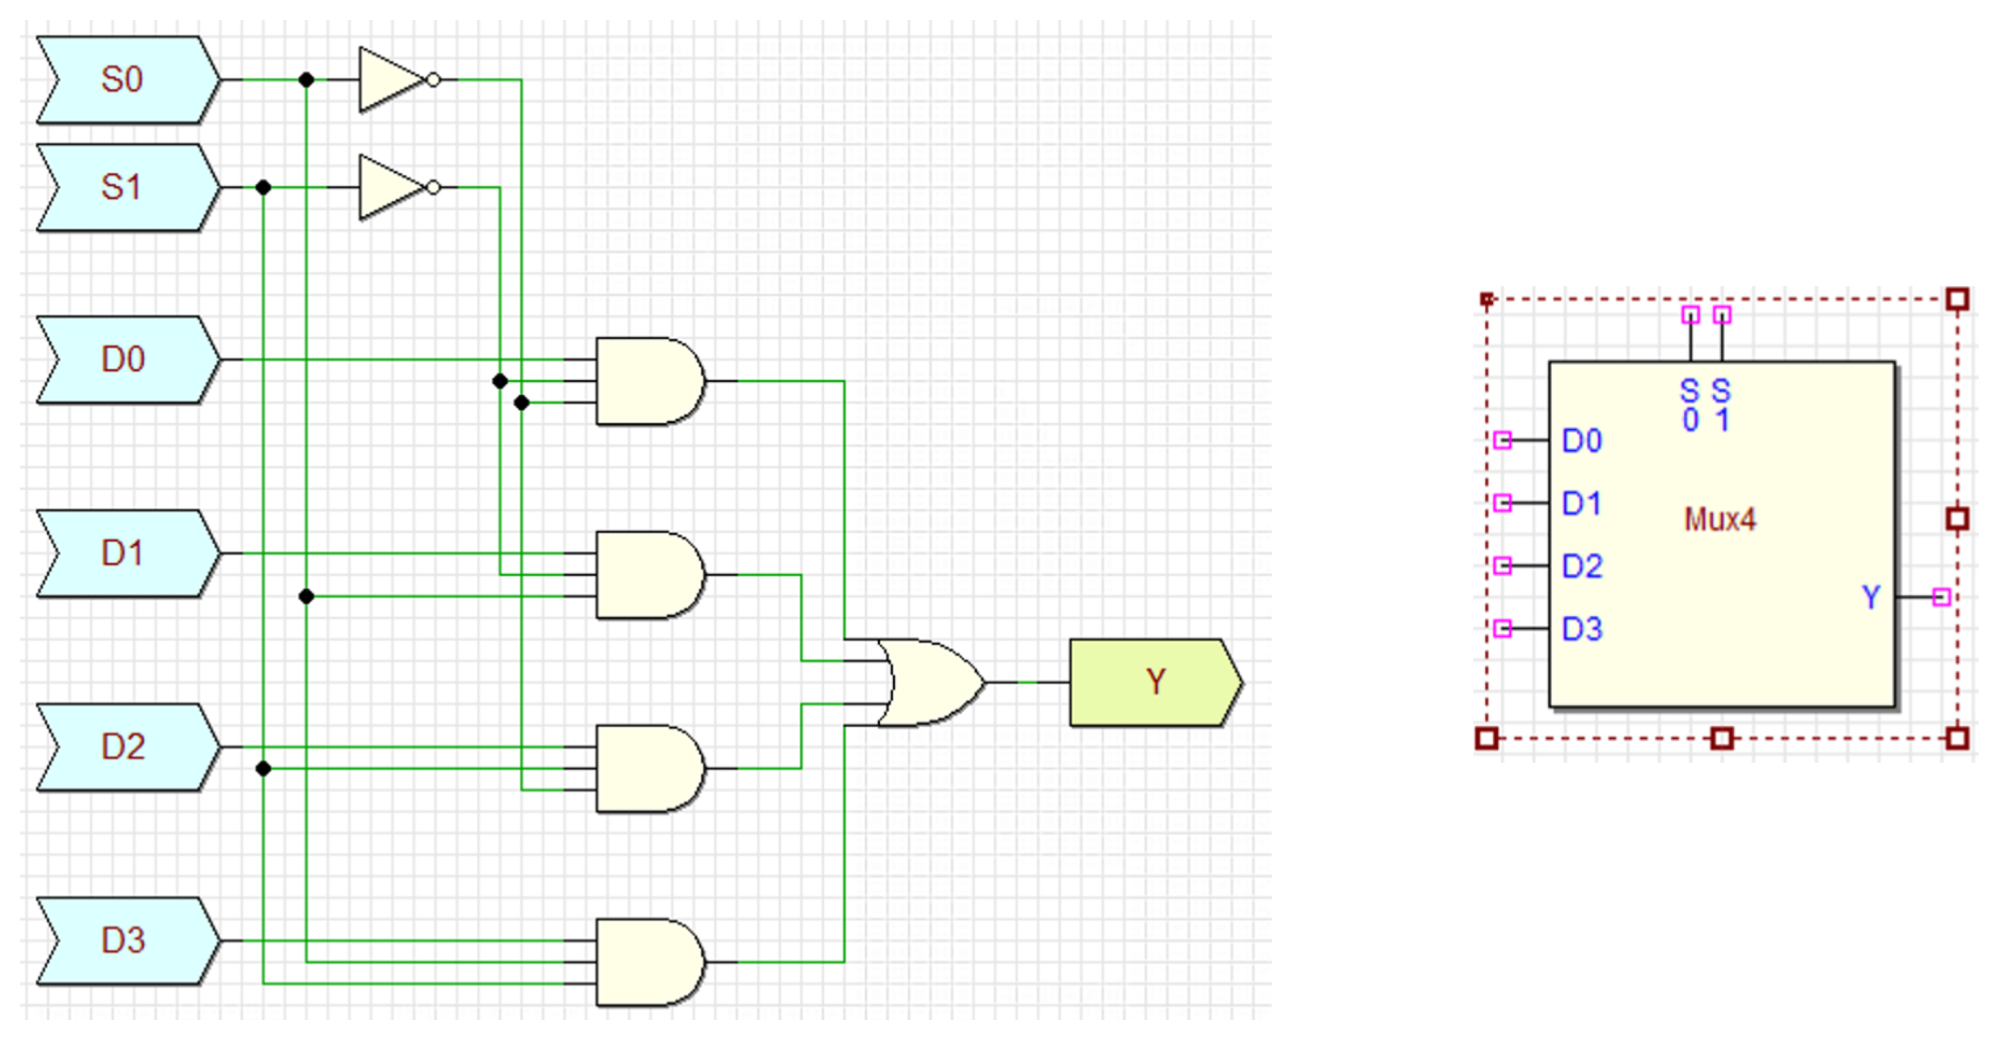

As before, we need to route four 8-bit input signals, so we must build an 8-bit version of the 4-to-1 multiplexer. This can be done by reusing the 1-bit 4-to-1 mux as a building block and instantiating eight of them in parallel. DEEDS also provides bus-based components that simplify this process and allow us to bundle and connect the signals efficiently. Find the bus-based 4-to-1 multiplexer in the DEEDS component library to incorporate into our design.

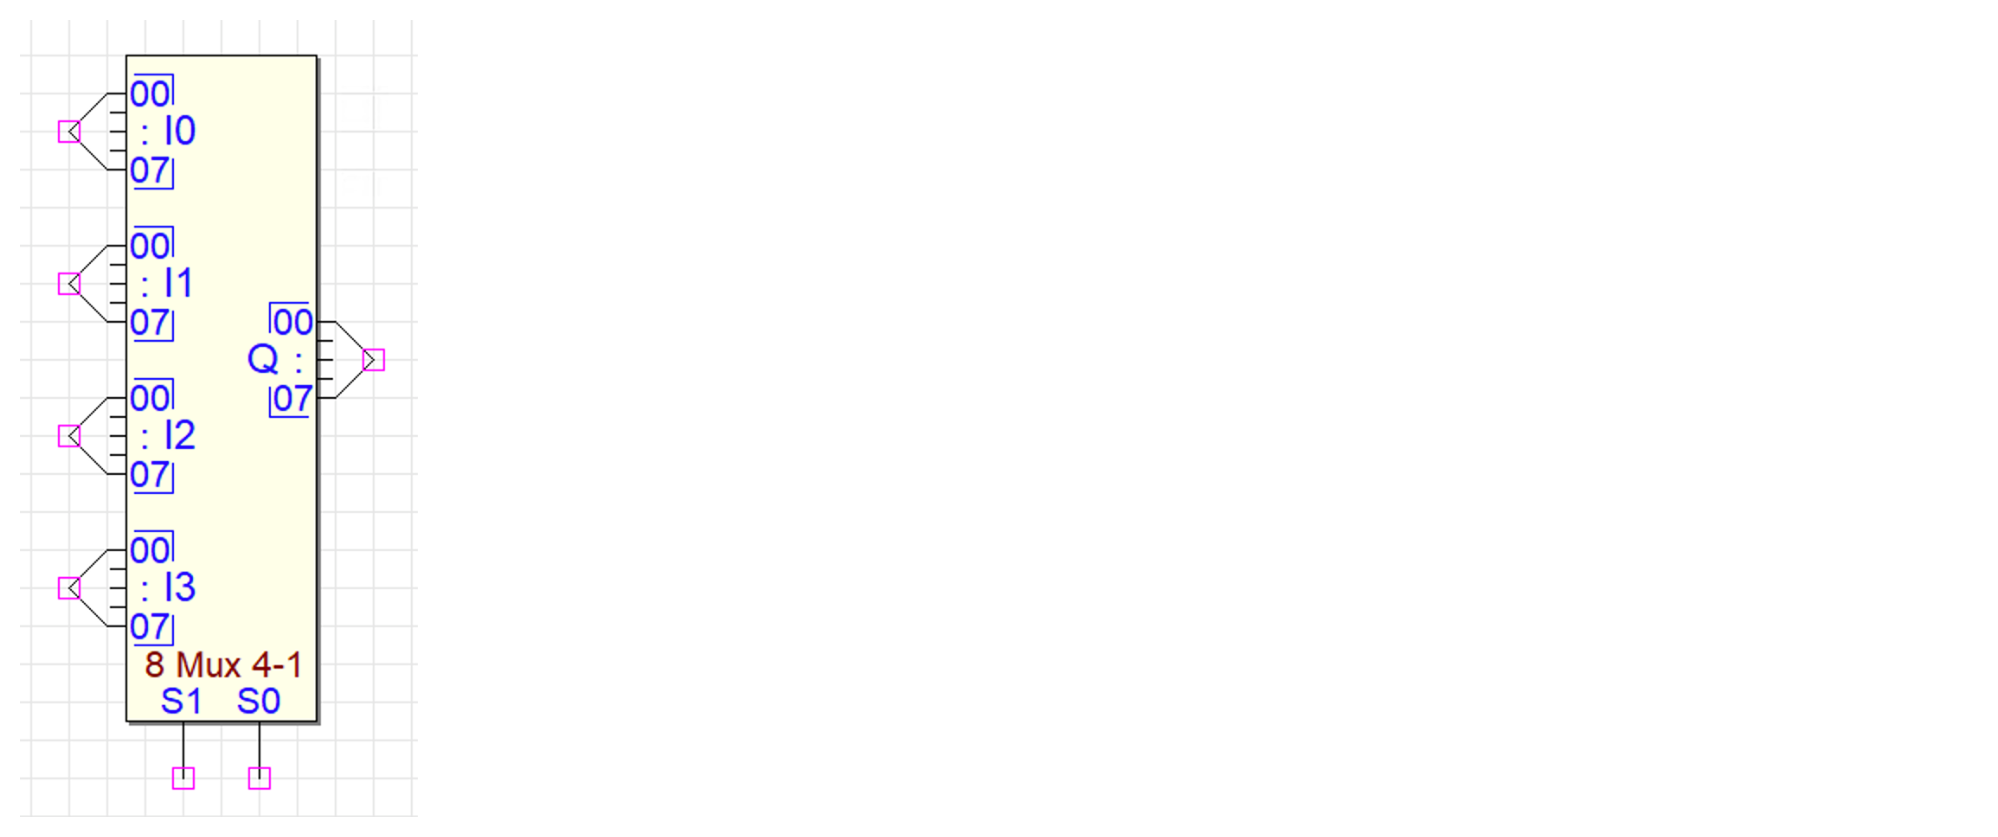

Develop the VHDL implementation of the 8-bit 4-to-1 multiplexer and include it in the Vivado project.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity Mux4 is
    port(
        D0 : in std_logic_vector(7 downto 0);
        D1 : in std_logic_vector(7 downto 0);
        D2 : in std_logic_vector(7 downto 0);
        D3 : in std_logic_vector(7 downto 0);
        S0 : in std_logic;
        S1 : in std_logic;
        Y  : out std_logic_vector(7 downto 0)
    );
end entity Mux4;

architecture logic of Mux4 is
    signal sel : std_logic_vector(1 downto 0);
begin
    sel <= S1 & S0;
    -- 4-to-1 selection based on S1 S0
    with sel select
        Y <= D0 when "00",
             D1 when "01",
             D2 when "10",
             D3 when "11",
             (others => '0') when others;  -- safe default
end architecture logic;

Write a testbench to verify the functionality of the multiplexer. Run a simulation and check that the circuit produces the correct output for every possible combination of inputs.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity tb_Mux4 is
end entity tb_Mux4;

architecture behavior of tb_Mux4 is

    -- Component declaration (8-bit version)
    component Mux4 is
        port(
            D0 : in std_logic_vector(7 downto 0);
            D1 : in std_logic_vector(7 downto 0);
            D2 : in std_logic_vector(7 downto 0);
            D3 : in std_logic_vector(7 downto 0);
            S0 : in std_logic;
            S1 : in std_logic;
            Y  : out std_logic_vector(7 downto 0)
        );
    end component;

    -- Signals for test
    signal D0, D1, D2, D3 : std_logic_vector(7 downto 0);
    signal S0, S1         : std_logic;
    signal Y              : std_logic_vector(7 downto 0);

begin

    -- Instantiate UUT
    uut: Mux4
        port map(
            D0 => D0,
            D1 => D1,
            D2 => D2,
            D3 => D3,
            S0 => S0,
            S1 => S1,
            Y  => Y
        );

    -- Stimulus process
    process
    begin
        -----------------------------------------------------------------
        -- First test pattern
        -----------------------------------------------------------------
        D0 <= x"0F";   -- 0000 1111
        D1 <= x"F0";   -- 1111 0000
        D2 <= x"AA";   -- 1010 1010
        D3 <= x"55";   -- 0101 0101

        -- S1 S0 = 00 => Y = D0
        S1 <= '0'; S0 <= '0'; wait for 10 ns;
        assert (Y = D0)
            report "ERROR: S1S0=00 => expected Y=D0"
            severity error;

        -- S1 S0 = 01 => Y = D1
        S1 <= '0'; S0 <= '1'; wait for 10 ns;
        assert (Y = D1)
            report "ERROR: S1S0=01 => expected Y=D1"
            severity error;

        -- S1 S0 = 10 => Y = D2
        S1 <= '1'; S0 <= '0'; wait for 10 ns;
        assert (Y = D2)
            report "ERROR: S1S0=10 => expected Y=D2"
            severity error;

        -- S1 S0 = 11 => Y = D3
        S1 <= '1'; S0 <= '1'; wait for 10 ns;
        assert (Y = D3)
            report "ERROR: S1S0=11 => expected Y=D3"
            severity error;

        -----------------------------------------------------------------
        -- Second test pattern
        -----------------------------------------------------------------
        D0 <= x"12";
        D1 <= x"34";
        D2 <= x"56";
        D3 <= x"78";

        -- S1 S0 = 00 => Y = D0
        S1 <= '0'; S0 <= '0'; wait for 10 ns;
        assert (Y = D0)
            report "ERROR: S1S0=00 => expected Y=D0 (pattern 2)"
            severity error;

        -- S1 S0 = 01 => Y = D1
        S1 <= '0'; S0 <= '1'; wait for 10 ns;
        assert (Y = D1)
            report "ERROR: S1S0=01 => expected Y=D1 (pattern 2)"
            severity error;

        -- S1 S0 = 10 => Y = D2
        S1 <= '1'; S0 <= '0'; wait for 10 ns;
        assert (Y = D2)
            report "ERROR: S1S0=10 => expected Y=D2 (pattern 2)"
            severity error;

        -- S1 S0 = 11 => Y = D3
        S1 <= '1'; S0 <= '1'; wait for 10 ns;
        assert (Y = D3)
            report "ERROR: S1S0=11 => expected Y=D3 (pattern 2)"
            severity error;

        report "All Mux4 tests passed successfully!" severity note;
        wait;  -- stop simulation
    end process;

end architecture behavior;


## 8-bit Adder

We need an 8-bit adder to support both addition and subtraction operations. First, we need to design a full adder— a circuit that adds two input bits and a carry-in bit, producing a sum bit and a carry-out bit.

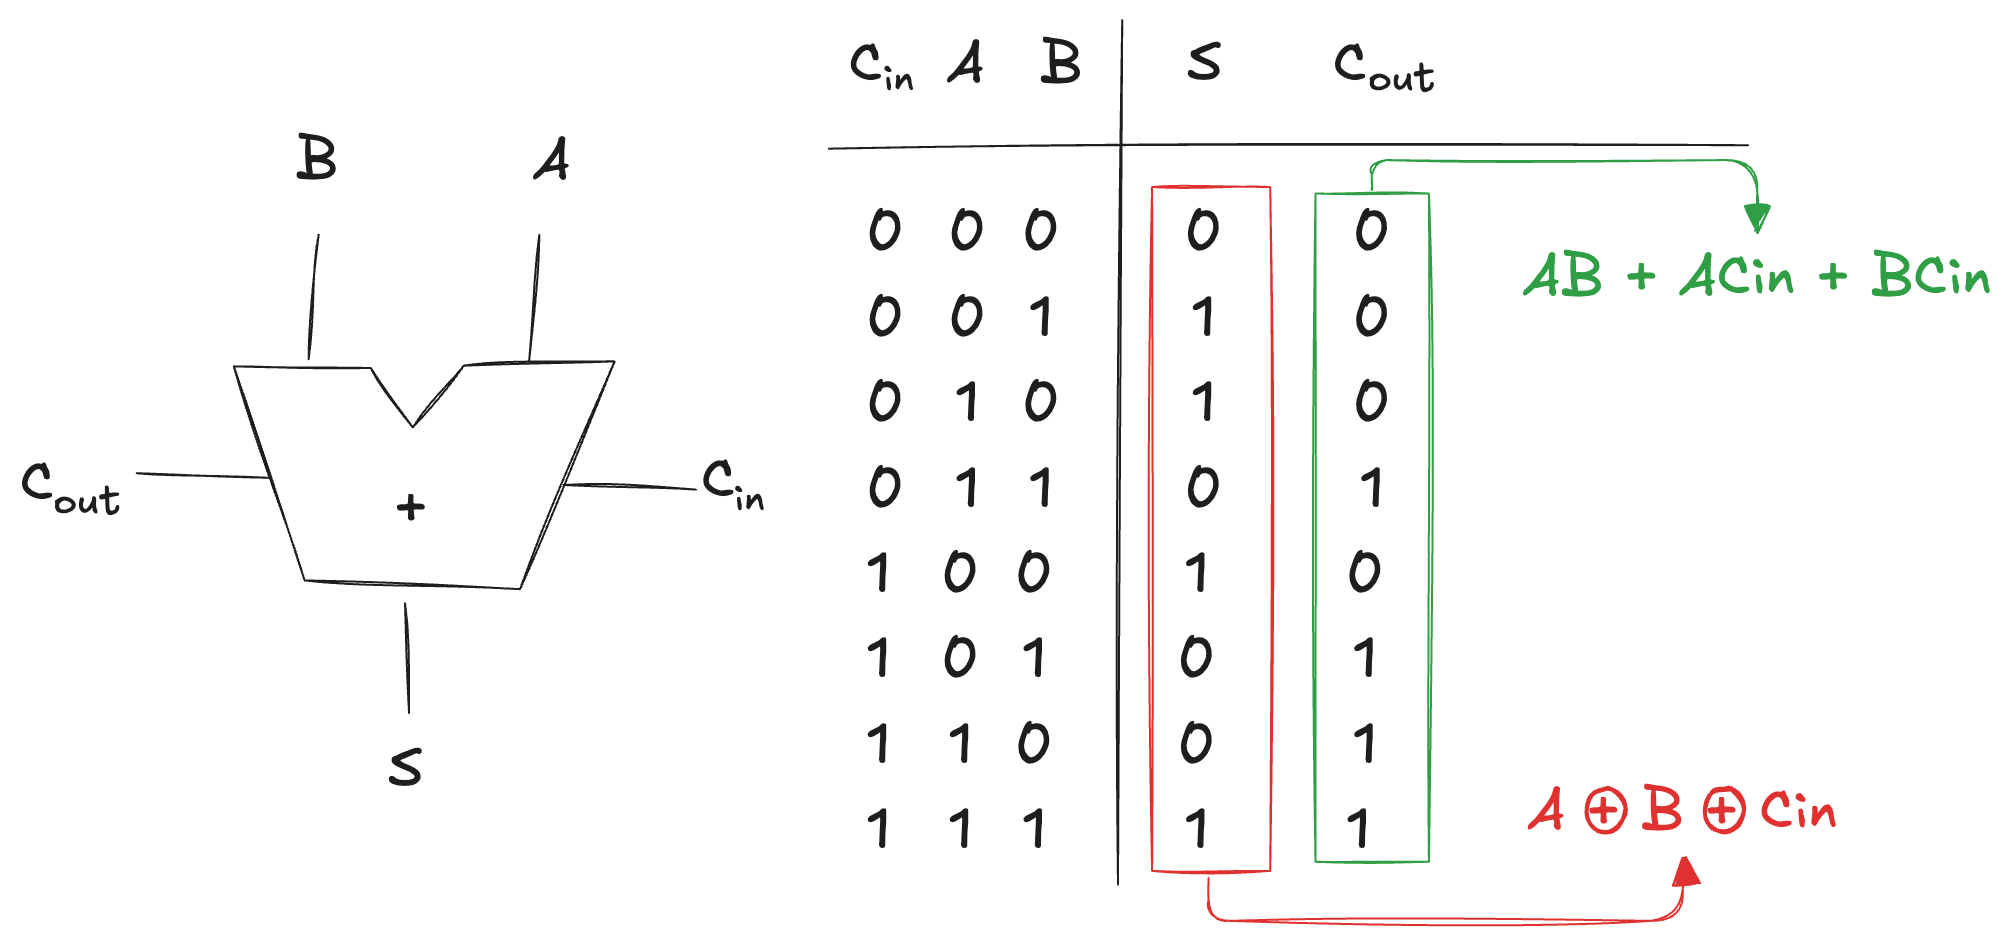

Design the full adder using DEEDS, simulate it, save it as a block diagram.

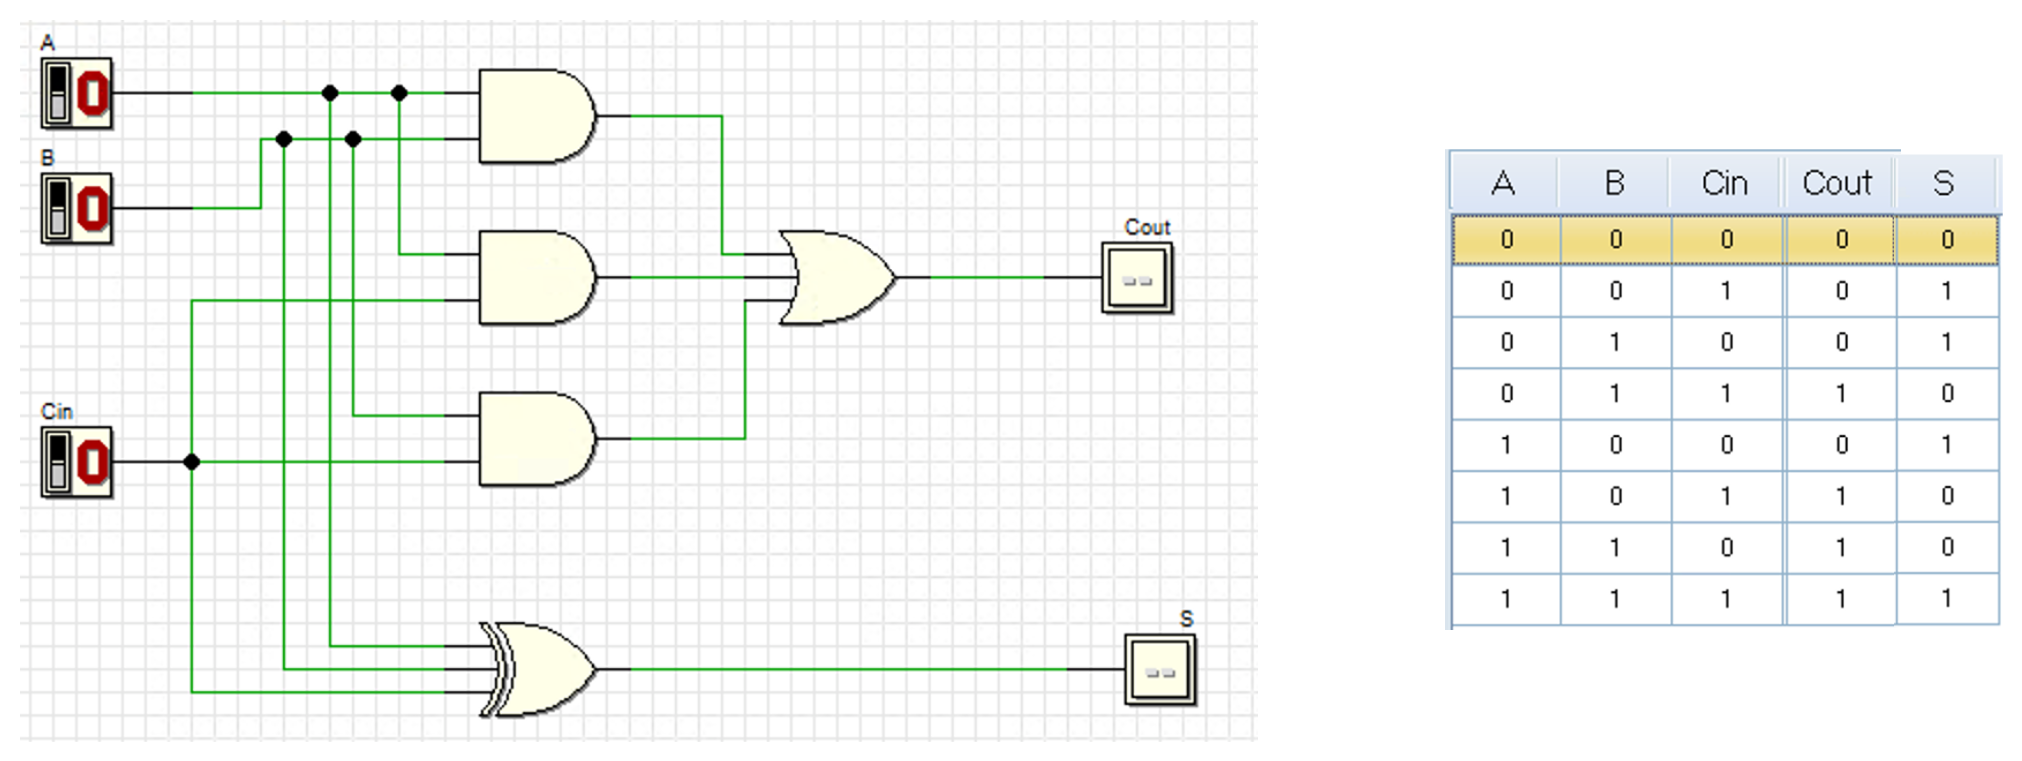

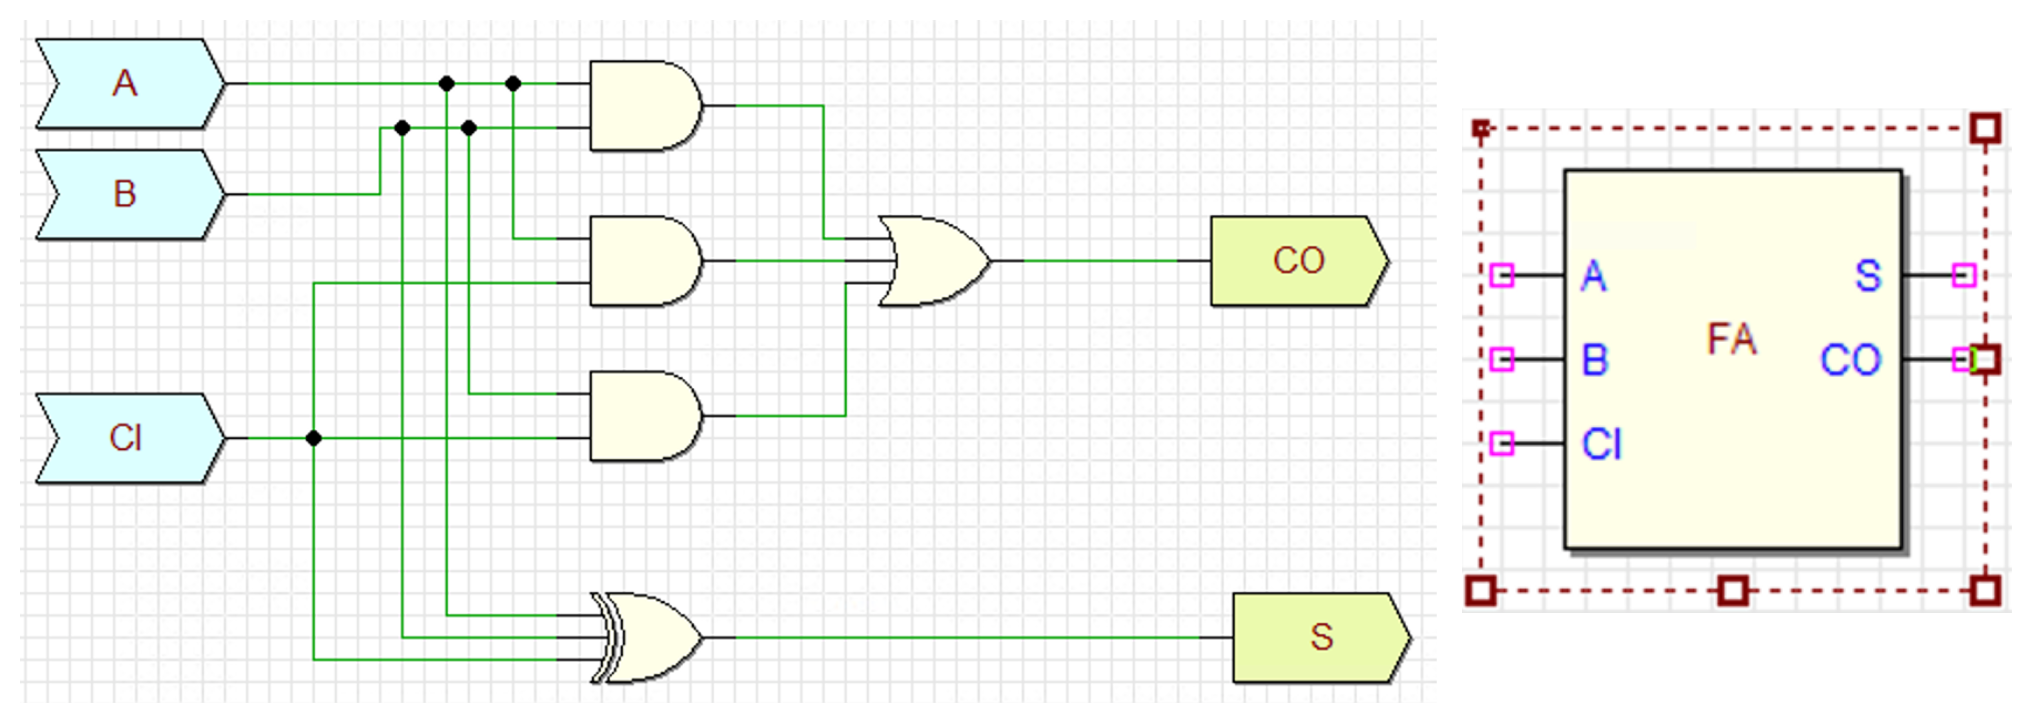

Write the VHDL description of the full adder and include it in the Vivado project.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity FullAdder is
    port(
        A    : in  std_logic;
        B    : in  std_logic;
        Cin  : in  std_logic;
        Sum  : out std_logic;
        Cout : out std_logic
    );
end entity FullAdder;

architecture logic of FullAdder is
begin
    Sum  <= A xor B xor Cin;
    Cout <= (A and B) or (Cin and (A xor B));
end architecture logic;

Write a testbench to verify the functionality of the full adder. Simulate the design and ensure that it behaves as expected for all possible input combinations.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity tb_FullAdder is
end entity;

architecture behavior of tb_FullAdder is

    -- Component declaration
    component FullAdder is
        port(
            A    : in  std_logic;
            B    : in  std_logic;
            Cin  : in  std_logic;
            Sum  : out std_logic;
            Cout : out std_logic
        );
    end component;

    signal A_tb, B_tb, Cin_tb : std_logic;
    signal Sum_tb, Cout_tb    : std_logic;

begin

    -- Instantiate the Unit Under Test
    UUT: FullAdder
        port map(
            A    => A_tb,
            B    => B_tb,
            Cin  => Cin_tb,
            Sum  => Sum_tb,
            Cout => Cout_tb
        );

    -- Stimulus process
    process
    begin

        --------------------------------------------------------------------
        -- Test 1: 0 + 0 + Cin = 0
        --------------------------------------------------------------------
        A_tb <= '0';  B_tb <= '0';  Cin_tb <= '0';
        wait for 10 ns;
        assert (Sum_tb = '0' and Cout_tb = '0')
            report "TEST 1 FAILED: 0 + 0 + 0 should be Sum=0 Cout=0" severity error;

        --------------------------------------------------------------------
        -- Test 2: 0 + 0 + 1 = 1
        --------------------------------------------------------------------
        Cin_tb <= '1';
        wait for 10 ns;
        assert (Sum_tb = '1' and Cout_tb = '0')
            report "TEST 2 FAILED: 0 + 0 + 1 should be Sum=1 Cout=0" severity error;

        --------------------------------------------------------------------
        -- Test 3: 0 + 1 + 0 = 1
        --------------------------------------------------------------------
        A_tb <= '0';  B_tb <= '1';  Cin_tb <= '0';
        wait for 10 ns;
        assert (Sum_tb = '1' and Cout_tb = '0')
            report "TEST 3 FAILED: 0 + 1 + 0 should be Sum=1 Cout=0" severity error;

        --------------------------------------------------------------------
        -- Test 4: 0 + 1 + 1 = 0 with carry
        --------------------------------------------------------------------
        Cin_tb <= '1';
        wait for 10 ns;
        assert (Sum_tb = '0' and Cout_tb = '1')
            report "TEST 4 FAILED: 0 + 1 + 1 should be Sum=0 Cout=1" severity error;

        --------------------------------------------------------------------
        -- Test 5: 1 + 0 + 0 = 1
        --------------------------------------------------------------------
        A_tb <= '1';  B_tb <= '0';  Cin_tb <= '0';
        wait for 10 ns;
        assert (Sum_tb = '1' and Cout_tb = '0')
            report "TEST 5 FAILED: 1 + 0 + 0 should be Sum=1 Cout=0" severity error;

        --------------------------------------------------------------------
        -- Test 6: 1 + 0 + 1 = 0 with carry
        --------------------------------------------------------------------
        Cin_tb <= '1';
        wait for 10 ns;
        assert (Sum_tb = '0' and Cout_tb = '1')
            report "TEST 6 FAILED: 1 + 0 + 1 should be Sum=0 Cout=1" severity error;

        --------------------------------------------------------------------
        -- Test 7: 1 + 1 + 0 = 0 with carry
        --------------------------------------------------------------------
        A_tb <= '1';  B_tb <= '1';  Cin_tb <= '0';
        wait for 10 ns;
        assert (Sum_tb = '0' and Cout_tb = '1')
            report "TEST 7 FAILED: 1 + 1 + 0 should be Sum=0 Cout=1" severity error;

        --------------------------------------------------------------------
        -- Test 8: 1 + 1 + 1 = 1 with carry
        --------------------------------------------------------------------
        Cin_tb <= '1';
        wait for 10 ns;
        assert (Sum_tb = '1' and Cout_tb = '1')
            report "TEST 8 FAILED: 1 + 1 + 1 should be Sum=1 Cout=1" severity error;

        --------------------------------------------------------------------
        report "FullAdder tests PASSED successfully!" severity note;

        wait;
    end process;

end architecture;

To support 8-bit addition, we must build an 8-bit adder. A straightforward approach is to use a ripple-carry structure, connecting eight full adders in series so that each carry-out feeds the next stage.

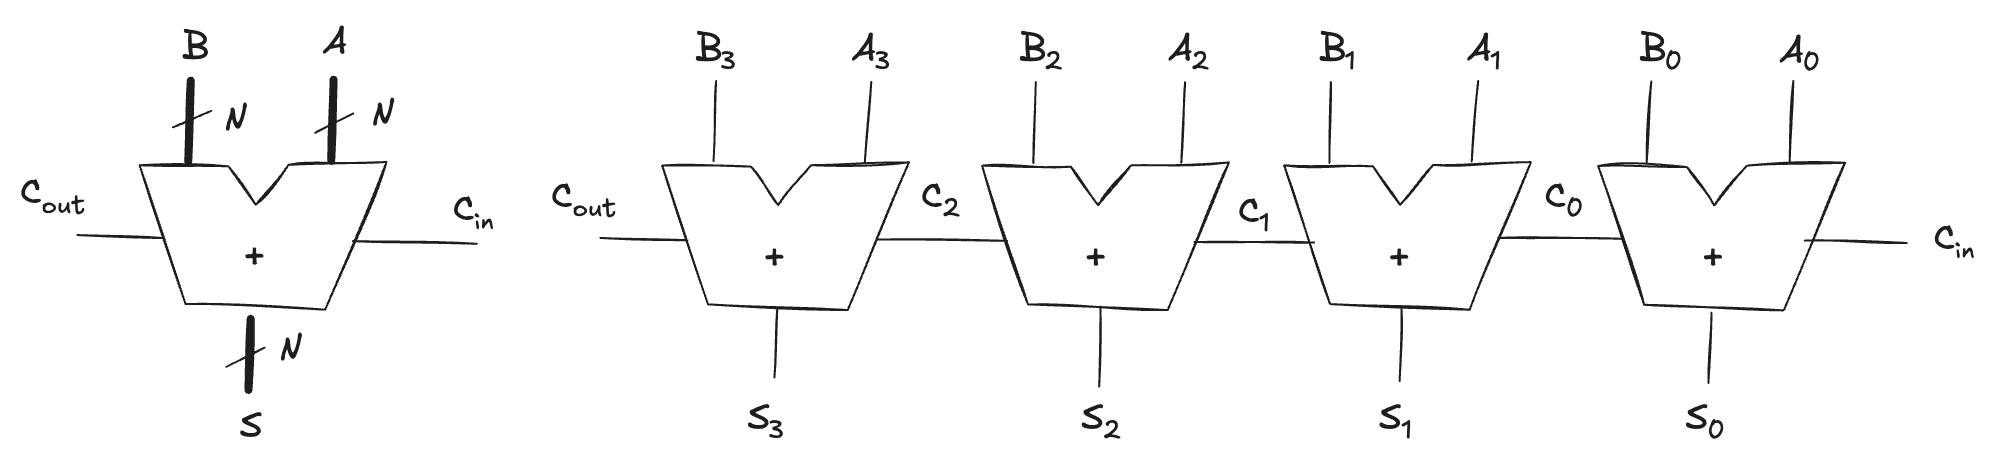

Using the full adder as a building block, design the 8-bit ripple-carry adder in DEEDS and simulate its behavior. As an intermediate step, begin by implementing a 4-bit version.

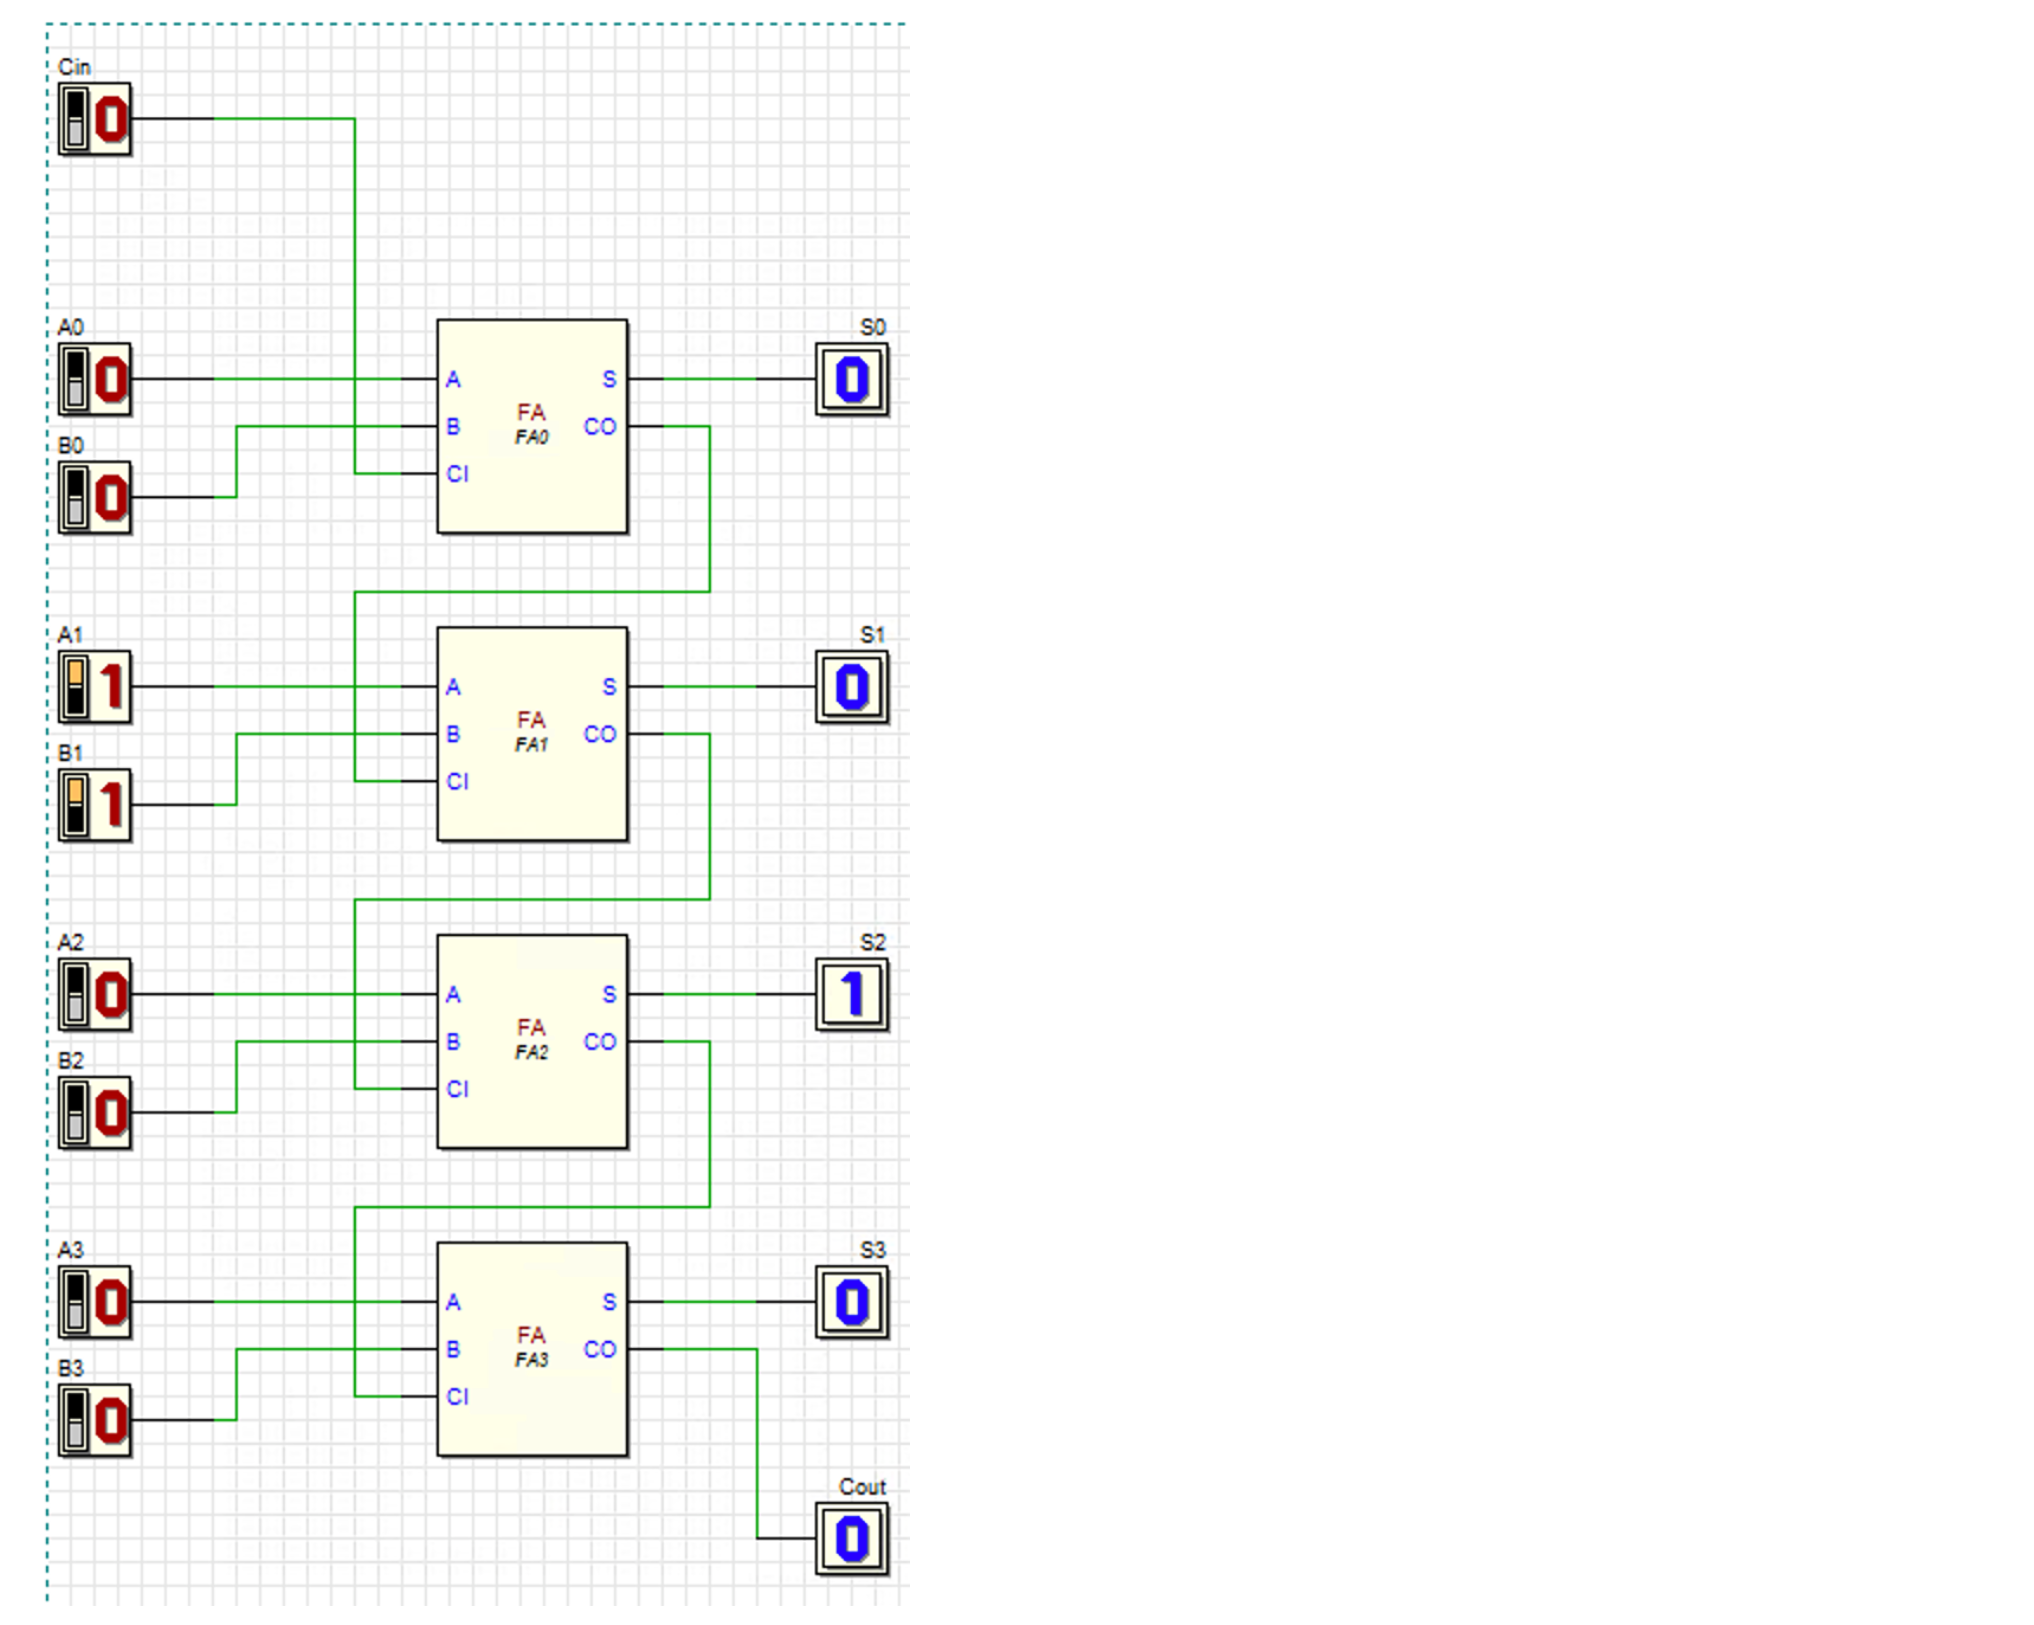

As the number of bits increases, using individual wires makes the schematic difficult to read. To keep the design clean and organized, redesign the 4-bit adder in DEEDS using bus connections.

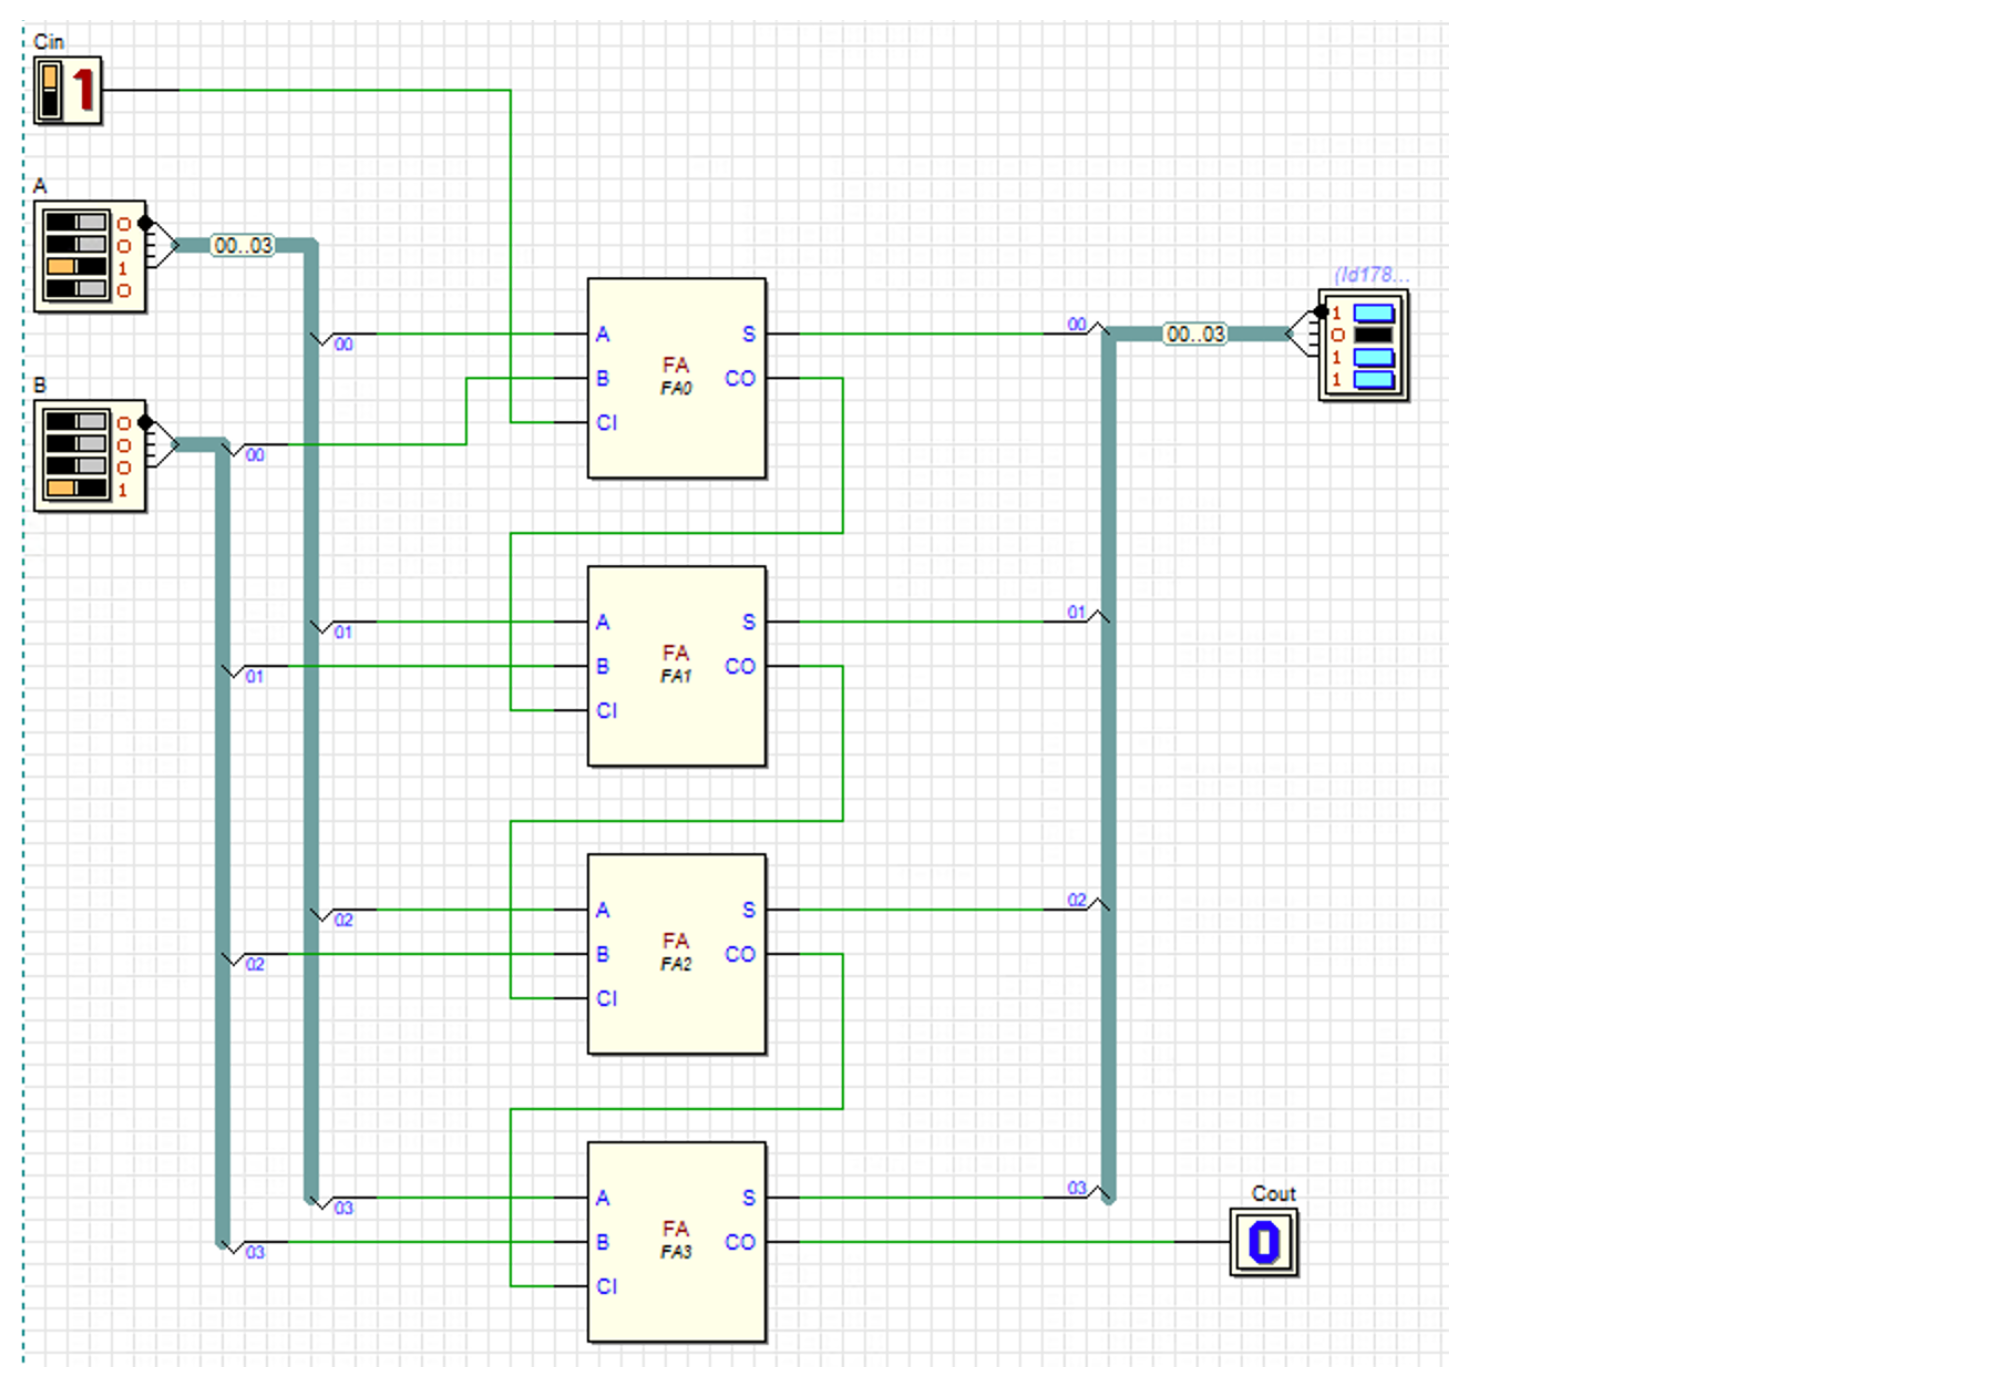

Unfortunately, DEEDS does not allow creating new components that contain custom-made blocks. However, it already provides an adder component that we can use in our design. Search the DEEDS component library for an 8-bit adder and incorporate it into our design.

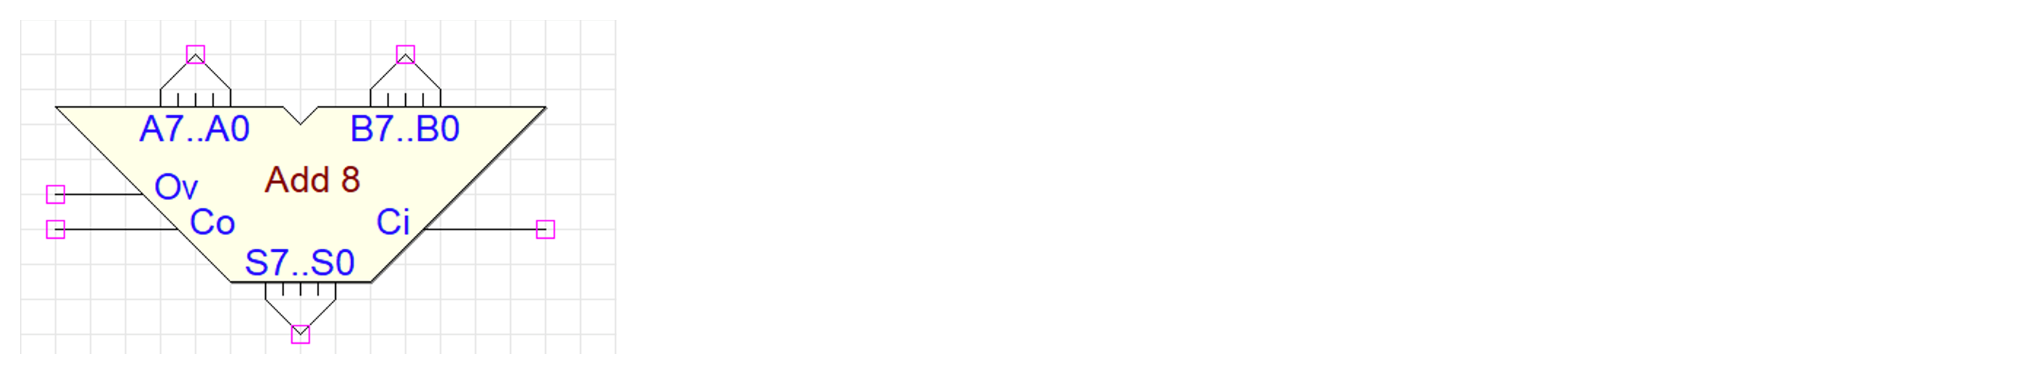

Write the VHDL description of the ripple-carry adder using the full adder you previously created, and add it to our Vivado project.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity RippleCarryAdder8 is
    port(
        A    : in  std_logic_vector(7 downto 0);
        B    : in  std_logic_vector(7 downto 0);
        Cin  : in  std_logic;
        S    : out std_logic_vector(7 downto 0);
        Cout : out std_logic
    );
end entity RippleCarryAdder8;

architecture structural of RippleCarryAdder8 is

    component FullAdder is
        port(
            A    : in  std_logic;
            B    : in  std_logic;
            Cin  : in  std_logic;
            Sum  : out std_logic;
            Cout : out std_logic
        );
    end component;

    signal C : std_logic_vector(7 downto 0);  -- internal carries

begin

    -- First bit (LSB) uses external Cin
    FA0: FullAdder
        port map(
            A    => A(0),
            B    => B(0),
            Cin  => Cin,
            Sum  => S(0),
            Cout => C(0)
        );

    -- Bits 1 to 6
    FA1: FullAdder port map(A(1), B(1), C(0), S(1), C(1));
    FA2: FullAdder port map(A(2), B(2), C(1), S(2), C(2));
    FA3: FullAdder port map(A(3), B(3), C(2), S(3), C(3));
    FA4: FullAdder port map(A(4), B(4), C(3), S(4), C(4));
    FA5: FullAdder port map(A(5), B(5), C(4), S(5), C(5));
    FA6: FullAdder port map(A(6), B(6), C(5), S(6), C(6));

    -- Last bit (MSB)
    FA7: FullAdder
        port map(
            A    => A(7),
            B    => B(7),
            Cin  => C(6),
            Sum  => S(7),
            Cout => Cout    -- final carry out
        );

end architecture structural;


Write a testbench to verify the functionality of the ripple-carry adder. Simulate the design and ensure that it behaves as expected for all possible input combinations.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;

entity tb_RippleCarryAdder8 is
end entity tb_RippleCarryAdder8;

architecture behavior of tb_RippleCarryAdder8 is

    component RippleCarryAdder8 is
        port(
            A    : in  std_logic_vector(7 downto 0);
            B    : in  std_logic_vector(7 downto 0);
            Cin  : in  std_logic;
            S    : out std_logic_vector(7 downto 0);
            Cout : out std_logic
        );
    end component;

    signal A_tb, B_tb : std_logic_vector(7 downto 0);
    signal Cin_tb     : std_logic;
    signal S_tb       : std_logic_vector(7 downto 0);
    signal Cout_tb    : std_logic;

begin

    UUT: RippleCarryAdder8
        port map(
            A    => A_tb,
            B    => B_tb,
            Cin  => Cin_tb,
            S    => S_tb,
            Cout => Cout_tb
        );

    -------------------------------------------------------------------------
    -- Testbench
    -------------------------------------------------------------------------
    process
        variable A_v, B_v : unsigned(7 downto 0);
        variable Cin_v    : unsigned(0 downto 0);
        variable expected : unsigned(8 downto 0);
    begin

        report "===== Starting tests (variable-driven version) =====" severity note;

        -----------------------------------------------------------------
        -- TEST 1
        -----------------------------------------------------------------
        A_v   := x"0A";
        B_v   := x"05";
        Cin_v := "0";

        A_tb   <= std_logic_vector(A_v);
        B_tb   <= std_logic_vector(B_v);
        Cin_tb <= Cin_v(0);

        wait for 10 ns;

        expected := ('0' & A_v) + ('0' & B_v) + Cin_v;

        assert unsigned(S_tb) = expected(7 downto 0)
            report "ERROR Test 1: wrong SUM" severity error;
        assert Cout_tb = expected(8)
            report "ERROR Test 1: wrong CARRY" severity error;

        -----------------------------------------------------------------
        -- TEST 2
        -----------------------------------------------------------------
        A_v   := x"10";
        B_v   := x"0F";
        Cin_v := "1";

        A_tb   <= std_logic_vector(A_v);
        B_tb   <= std_logic_vector(B_v);
        Cin_tb <= Cin_v(0);

        wait for 10 ns;

        expected := ('0' & A_v) + ('0' & B_v) + Cin_v;

        assert unsigned(S_tb) = expected(7 downto 0)
            report "ERROR Test 2: wrong SUM" severity error;
        assert Cout_tb = expected(8)
            report "ERROR Test 2: wrong CARRY" severity error;

        -----------------------------------------------------------------
        -- TEST 3
        -----------------------------------------------------------------
        A_v   := x"FF";
        B_v   := x"01";
        Cin_v := "0";

        A_tb   <= std_logic_vector(A_v);
        B_tb   <= std_logic_vector(B_v);
        Cin_tb <= Cin_v(0);

        wait for 10 ns;

        expected := ('0' & A_v) + ('0' & B_v) + Cin_v;

        assert unsigned(S_tb) = expected(7 downto 0)
            report "ERROR Test 3: wrong SUM" severity error;
        assert Cout_tb = expected(8)
            report "ERROR Test 3: wrong CARRY" severity error;

        -----------------------------------------------------------------
        -- DONE
        -----------------------------------------------------------------
        report "RippleCarryAdder tests PASSED successfully" severity note;
        wait;

    end process;

end architecture behavior;


## Putting everything together

Using the DEEDS adder, multiplexers, and the AND/OR gates, build the complete ALU design. Simulate the ALU in DEEDS to verify that each operation behaves correctly based on the control signals.

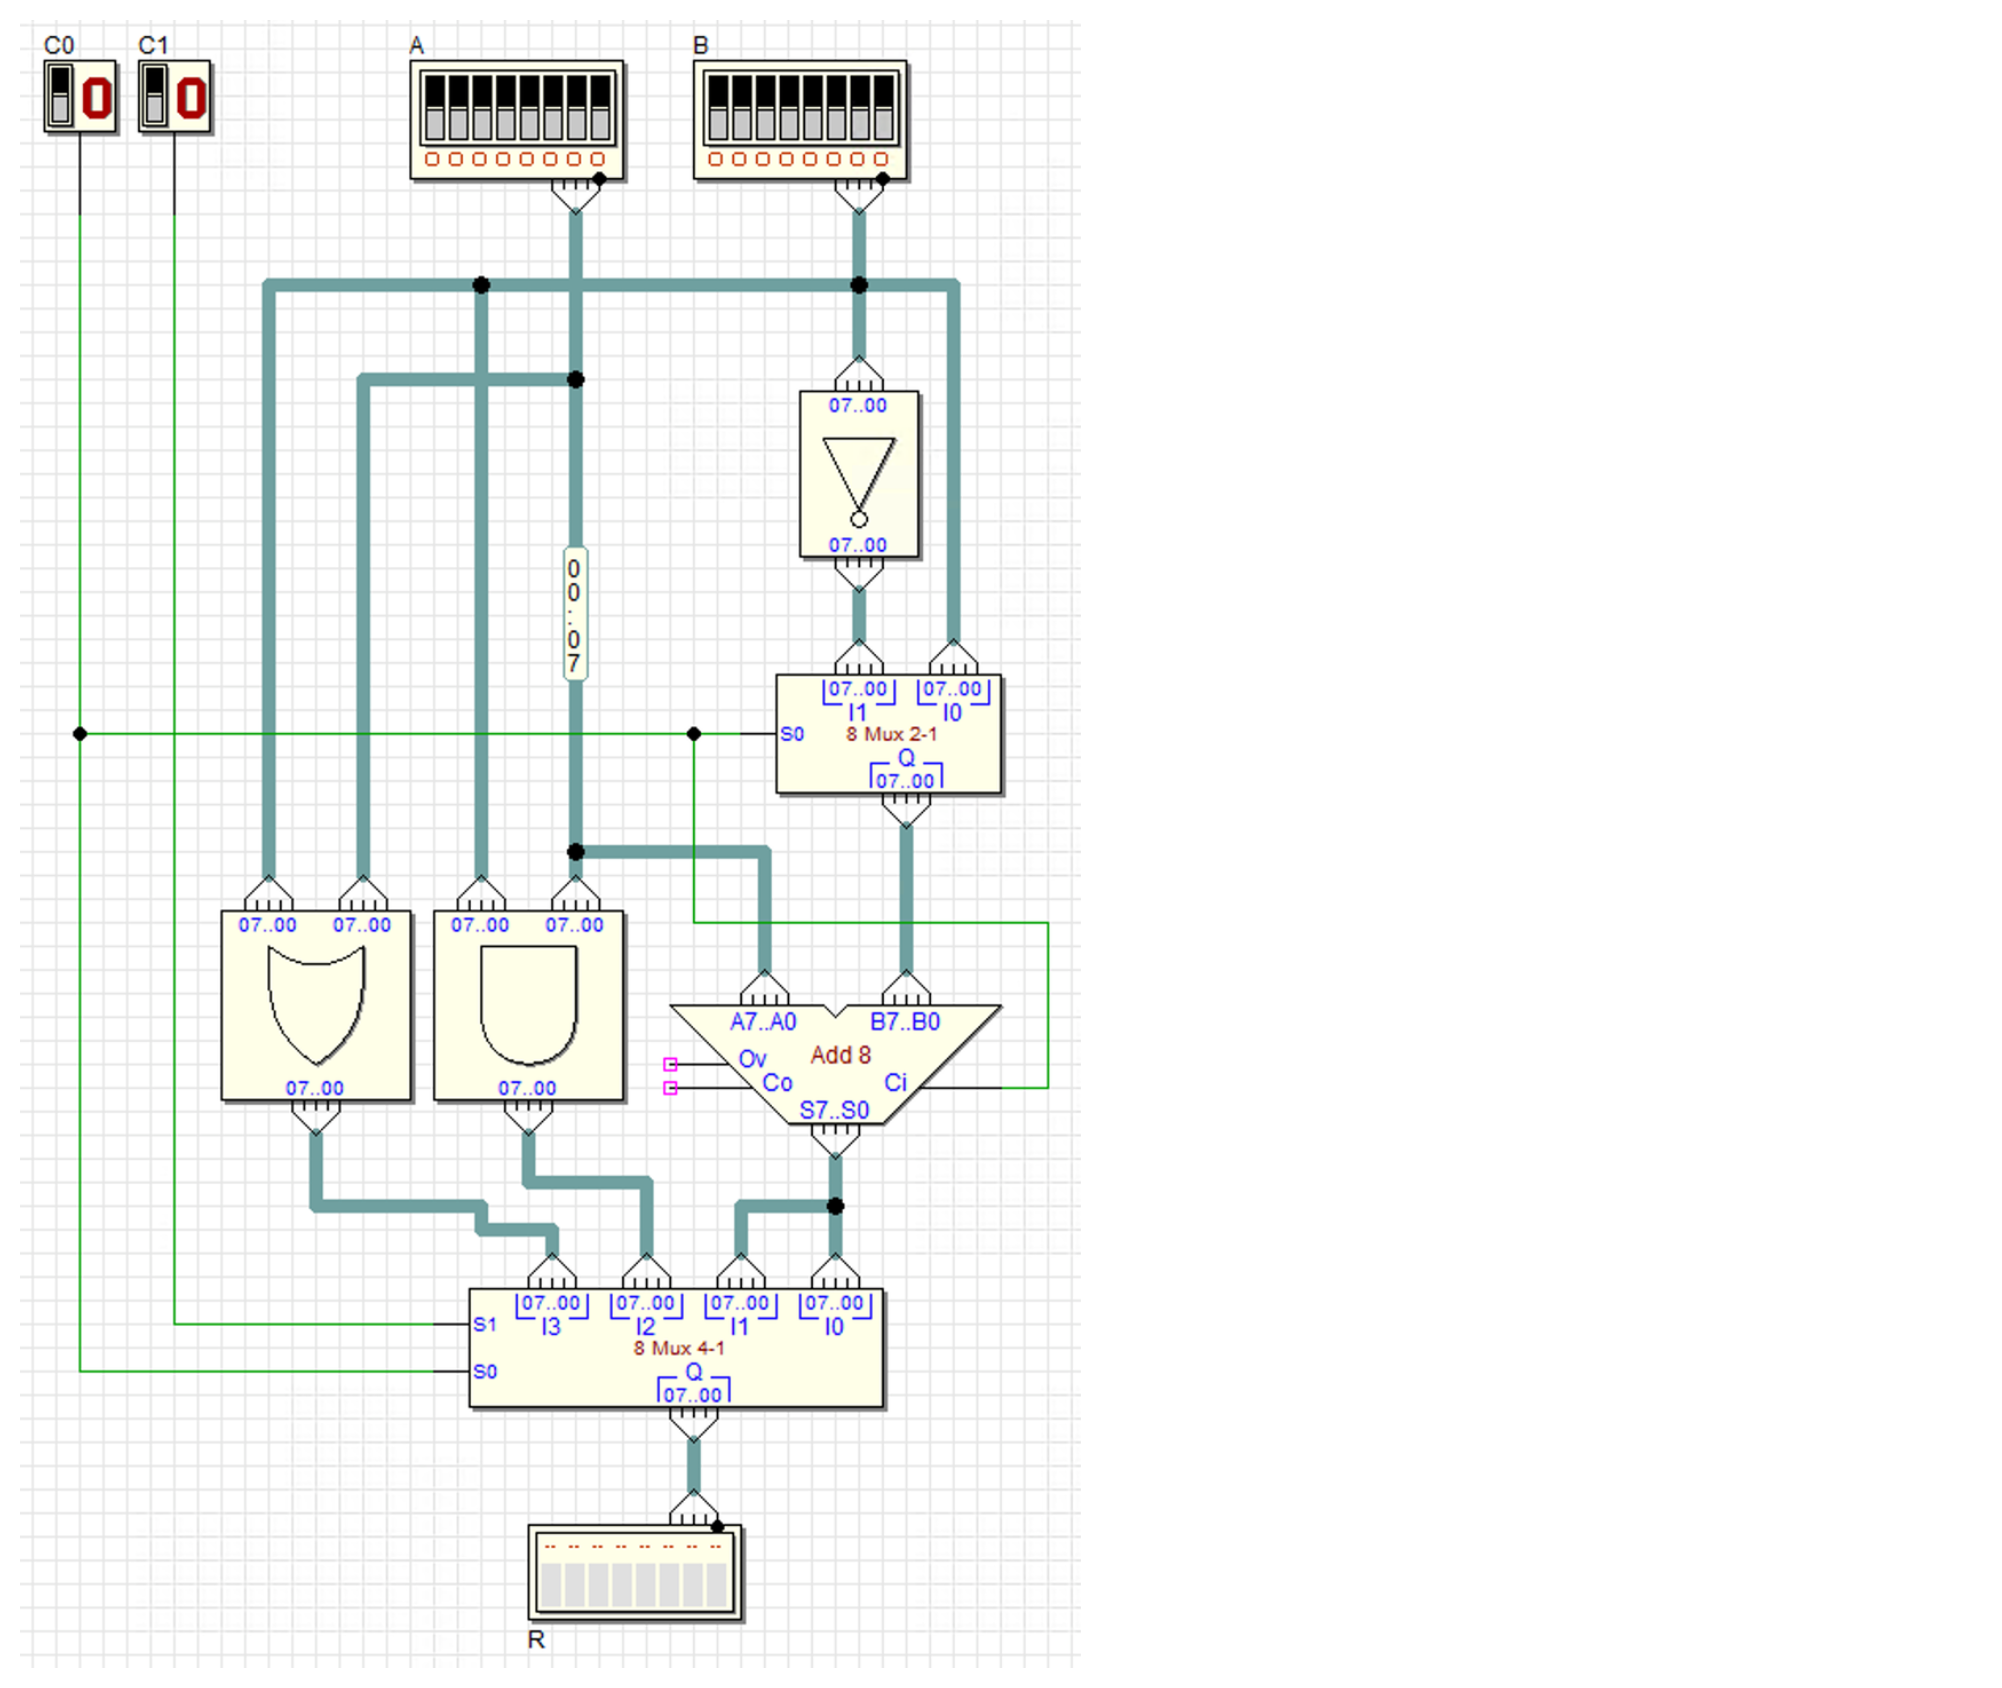

Using the VHDL enetities created in the previous steps, write the VHDL description of the complete ALU and add it to our Vivado project.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;

entity ALU8 is
    port(
        A    : in  std_logic_vector(7 downto 0);
        B    : in  std_logic_vector(7 downto 0);
        C1   : in  std_logic;  -- control bit MSB
        C0   : in  std_logic;  -- control bit LSB
        R    : out std_logic_vector(7 downto 0);  -- ALU result
        C    : out std_logic                       -- final carry-out
    );
end entity ALU8;

architecture structural of ALU8 is

    ----------------------------------------------------
    -- Components
    ----------------------------------------------------
    component RippleCarryAdder8 is
        port(
            A    : in  std_logic_vector(7 downto 0);
            B    : in  std_logic_vector(7 downto 0);
            Cin  : in  std_logic;
            S    : out std_logic_vector(7 downto 0);
            Cout : out std_logic
        );
    end component;

    component Mux2 is
        port(
            D0 : in  std_logic_vector(7 downto 0);
            D1 : in  std_logic_vector(7 downto 0);
            S  : in  std_logic;
            Y  : out std_logic_vector(7 downto 0)
        );
    end component;

    component Mux4 is
        port(
            D0 : in std_logic_vector(7 downto 0);
            D1 : in std_logic_vector(7 downto 0);
            D2 : in std_logic_vector(7 downto 0);
            D3 : in std_logic_vector(7 downto 0);
            S0 : in std_logic;
            S1 : in std_logic;
            Y  : out std_logic_vector(7 downto 0)
        );
    end component;

    ----------------------------------------------------
    -- Internal signals
    ----------------------------------------------------
    signal B_not   : std_logic_vector(7 downto 0);
    signal B_sel   : std_logic_vector(7 downto 0);
    signal SumRes  : std_logic_vector(7 downto 0);
    signal Cout    : std_logic;

    signal AndRes  : std_logic_vector(7 downto 0);
    signal OrRes   : std_logic_vector(7 downto 0);

begin

    ----------------------------------------------------
    -- Generate ~B (bitwise NOT of B)
    ----------------------------------------------------
    B_not <= not B;

    ----------------------------------------------------
    -- Mux2 selects B or ~B
    -- C0 = 0 → ADD mode: B_sel = B
    -- C0 = 1 → SUB mode: B_sel = ~B
    ----------------------------------------------------
    B_SELECTOR: Mux2
        port map(
            D0 => B,
            D1 => B_not,
            S  => C0,
            Y  => B_sel
        );

    ----------------------------------------------------
    -- Logical operations
    ----------------------------------------------------
    AndRes <= A and B;
    OrRes  <= A or  B;

    ----------------------------------------------------
    -- Ripple-carry adder:
    -- Cin = C0  (0 for ADD, 1 for SUB)
    ----------------------------------------------------
    ADDER: RippleCarryAdder8
        port map(
            A    => A,
            B    => B_sel,
            Cin  => C0,
            S    => SumRes,
            Cout => Cout
        );

    ----------------------------------------------------
    -- Mux4 selects the ALU output
    -- C1C0 = 00 → AND
    -- C1C0 = 01 → OR
    -- C1C0 = 10 → ADD
    -- C1C0 = 11 → SUB
    ----------------------------------------------------
    OUTPUT_SELECTOR: Mux4
        port map(
            D0 => AndRes,   -- 00
            D1 => OrRes,    -- 01
            D2 => SumRes,   -- 10 (ADD)
            D3 => SumRes,   -- 11 (SUB)
            S0 => C0,
            S1 => C1,
            Y  => R
        );

    ----------------------------------------------------
    -- Carry output (only meaningful for ADD/SUB)
    ----------------------------------------------------
    C <= Cout;

end architecture structural;


Write a testbench to verify the funtionality of the complete ALU. Simulate the design and ensure that it behaves as expected for all possible input combinations and control signal configurations.

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;

entity tb_ALU8 is
end entity;

architecture behavior of tb_ALU8 is

    -- Component under test
    component ALU8 is
        port(
            A    : in  std_logic_vector(7 downto 0);
            B    : in  std_logic_vector(7 downto 0);
            C1   : in  std_logic;
            C0   : in  std_logic;
            R    : out std_logic_vector(7 downto 0);
            C    : out std_logic
        );
    end component;

    -- Signals
    signal A_tb, B_tb : std_logic_vector(7 downto 0);
    signal C1_tb, C0_tb : std_logic;
    signal R_tb : std_logic_vector(7 downto 0);
    signal C_tb : std_logic;

begin

    -- Instantiate the ALU
    UUT: ALU8
        port map(
            A => A_tb,
            B => B_tb,
            C1 => C1_tb,
            C0 => C0_tb,
            R => R_tb,
            C => C_tb
        );

    -- Stimulus
    process
    begin

        --------------------------------------------------------------------
        -- Test 1: AND
        --------------------------------------------------------------------
        A_tb <= x"0F";        -- 0000 1111
        B_tb <= x"33";        -- 0011 0011
        C1_tb <= '0'; C0_tb <= '0';  -- AND
        wait for 10 ns;

        assert R_tb = (A_tb and B_tb)
            report "AND FAILED" severity error;

        --------------------------------------------------------------------
        -- Test 2: OR
        --------------------------------------------------------------------
        C1_tb <= '0'; C0_tb <= '1';  -- OR
        wait for 10 ns;

        assert R_tb = (A_tb or B_tb)
            report "OR FAILED" severity error;

        --------------------------------------------------------------------
        -- Test 3: ADD
        --------------------------------------------------------------------
        A_tb <= x"10";        -- 16
        B_tb <= x"05";        --  5
        C1_tb <= '1'; C0_tb <= '0';  -- ADD
        wait for 10 ns;

        assert unsigned(R_tb) = unsigned(A_tb) + unsigned(B_tb)
            report "ADD FAILED" severity error;

        --------------------------------------------------------------------
        -- Test 4: SUB
        --------------------------------------------------------------------
        A_tb <= x"20";       -- 32
        B_tb <= x"10";       -- 16
        C1_tb <= '1'; C0_tb <= '1';  -- SUB
        wait for 10 ns;

        assert unsigned(R_tb) = unsigned(A_tb) - unsigned(B_tb)
            report "SUB FAILED" severity error;

        --------------------------------------------------------------------
        -- Done!
        --------------------------------------------------------------------
        report "ALU tests passed!" severity note;
        wait;

    end process;

end architecture;


## Next Steps

Explore additional operations to enhance the ALU's capabilities, such as adding flag outputs (zero, carry, overflow) or other bitwise operations like XOR and NAND. Another improvement could be extend the ALU to more than 8 bits, such as 16 or 32 bits, to handle larger data sizes. In that case, consider using more advanced adder architectures, like carry-lookahead adders, to improve performance.